In [109]:
import pandas as pd
import numpy as np
import seaborn as sns


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib import pyplot as plt
from matplotlib import pyplot


import pandas_profiling
from pandas import read_csv
from pandas.plotting import scatter_matrix


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer,MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB



from scipy.sparse.linalg import svds
from imblearn.over_sampling import SMOTE, ADASYN


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, GlobalAveragePooling2D
import tensorflow.keras as keras
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.wrappers.scikit_learn import KerasClassifier


from IPython.display import clear_output


import torch
from torch.autograd import Variable


%matplotlib inline
%config InlineBackend.figure_format = 'retina' # для более четкой отрисовки графиков

In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install xlrd 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import xlrd

In [5]:
df1 = pd.read_excel('/content/X_bp.xlsx')
df1.head(5)


,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [6]:
df1.shape

(1023, 11)

In [7]:
df2 = pd.read_excel('/content/X_nup.xlsx')
df2.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.0,57.0
1,1,0,4.0,60.0
2,2,0,4.0,70.0
3,3,0,5.0,47.0
4,4,0,5.0,57.0


In [8]:
df2.shape

(1040, 4)

In [ ]:
df1.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df2.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [112]:
 df3_merged = pd.merge(df1, df2) 
 df3_merged.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [10]:
df3_merged.shape

(1023, 14)

In [11]:
df3_merged.dtypes

Unnamed: 0                                int64
Соотношение матрица-наполнитель         float64
Плотность, кг/м3                        float64
модуль упругости, ГПа                   float64
Количество отвердителя, м.%             float64
Содержание эпоксидных групп,%_2         float64
Температура вспышки, С_2                float64
Поверхностная плотность, г/м2           float64
Модуль упругости при растяжении, ГПа    float64
Прочность при растяжении, МПа           float64
Потребление смолы, г/м2                 float64
Угол нашивки, град                        int64
Шаг нашивки                             float64
Плотность нашивки                       float64
dtype: object

In [12]:
df3_merged.isna().sum()

Unnamed: 0                              0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
df3_merged.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
df3_merged.drop(['Плотность, кг/м3', 'Количество отвердителя, м.%',	'Содержание эпоксидных групп,%_2',	'Температура вспышки, С_2',	'Поверхностная плотность, г/м2', 'модуль упругости, ГПа','Потребление смолы, г/м2',	'Угол нашивки, град',	'Шаг нашивки', 'Плотность нашивки'], axis=1)


,Unnamed: 0,Соотношение матрица-наполнитель,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
0,0,1.857143,70.000000,3000.000000
1,1,1.857143,70.000000,3000.000000
2,2,1.857143,70.000000,3000.000000
3,3,1.857143,70.000000,3000.000000
4,4,2.771331,70.000000,3000.000000
...,...,...,...,...
1018,1018,2.271346,73.090961,2387.292495
1019,1019,3.444022,72.920827,2360.392784
1020,1020,3.280604,74.734344,2662.906040
1021,1021,3.705351,74.042708,2071.715856


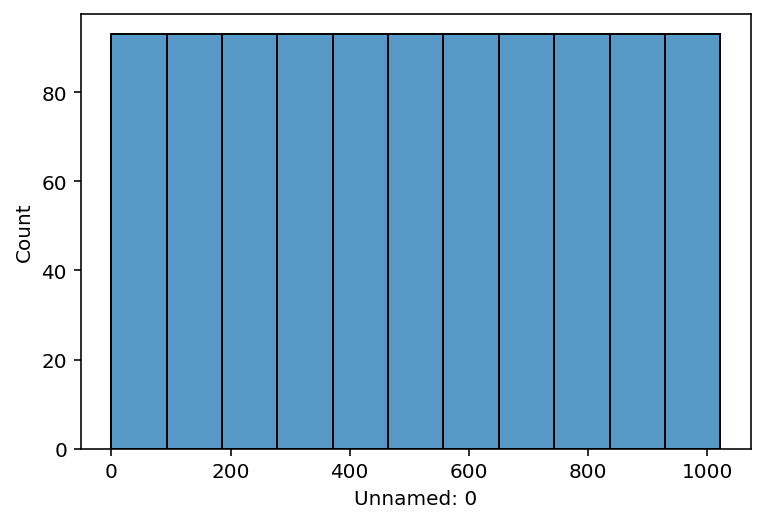

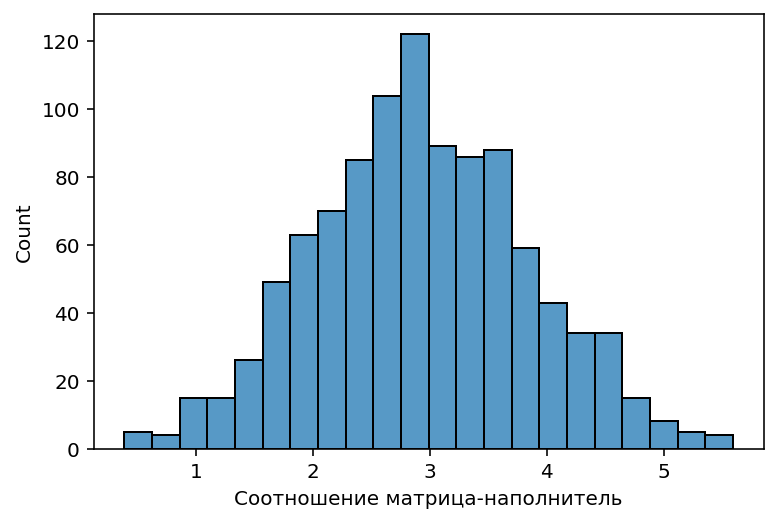

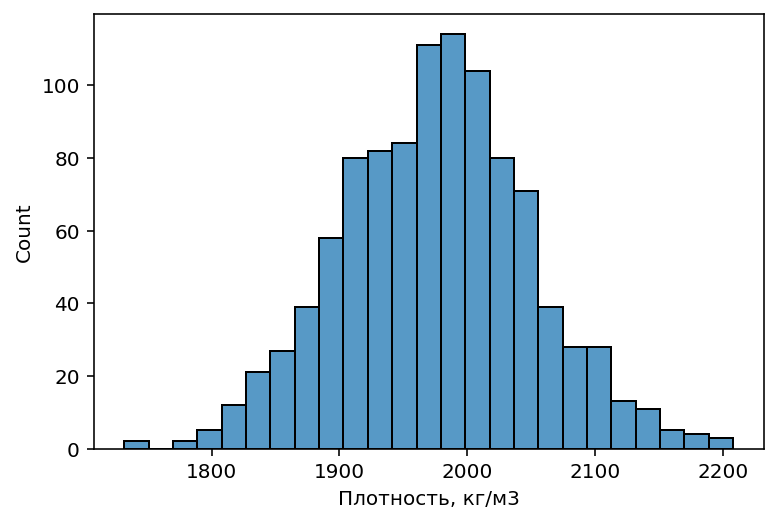

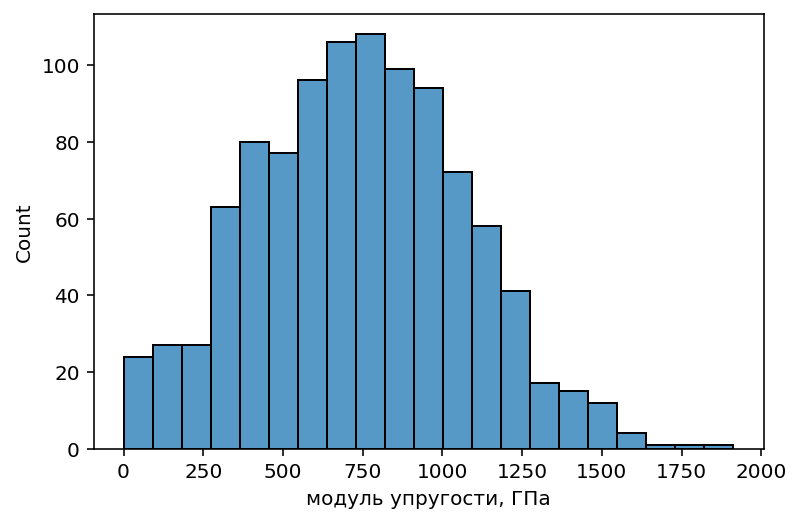

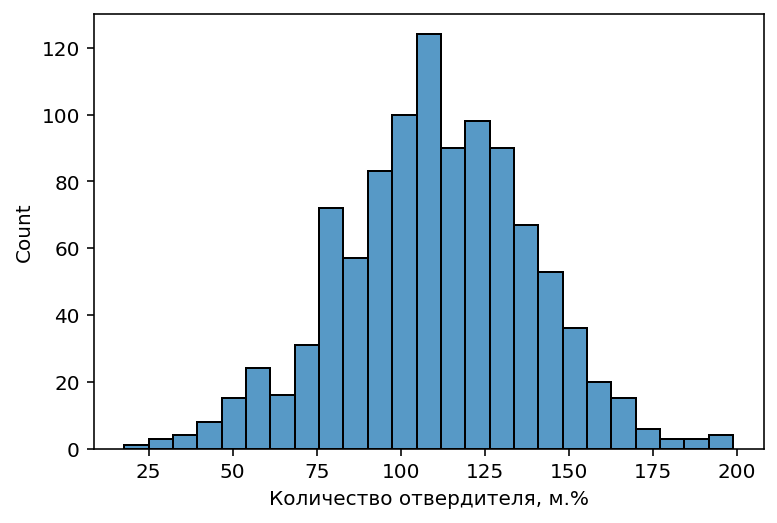

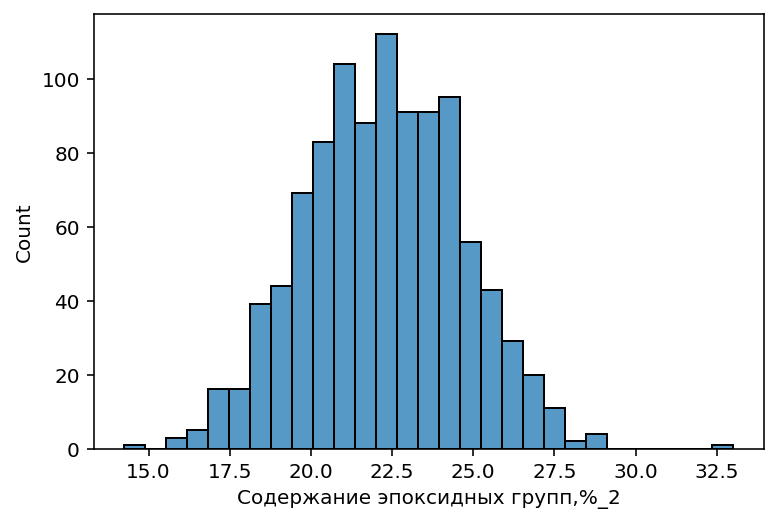

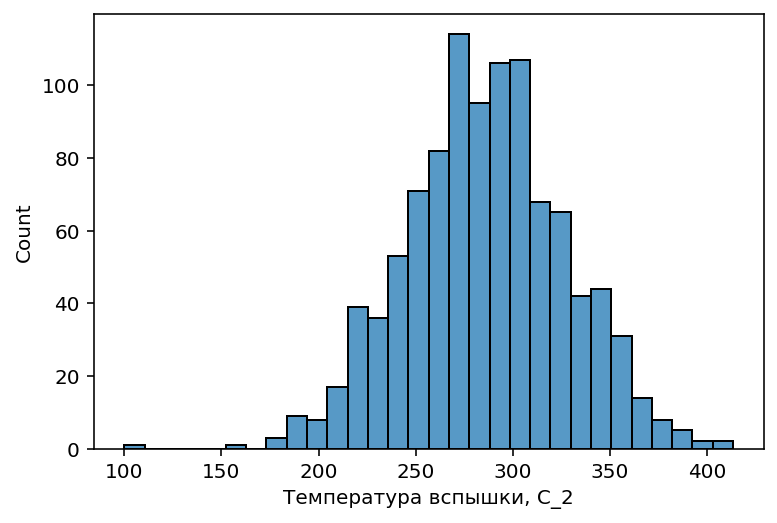

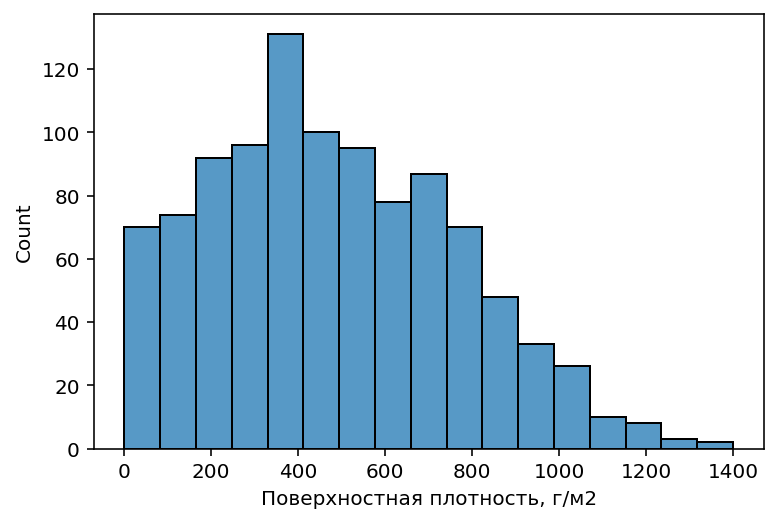

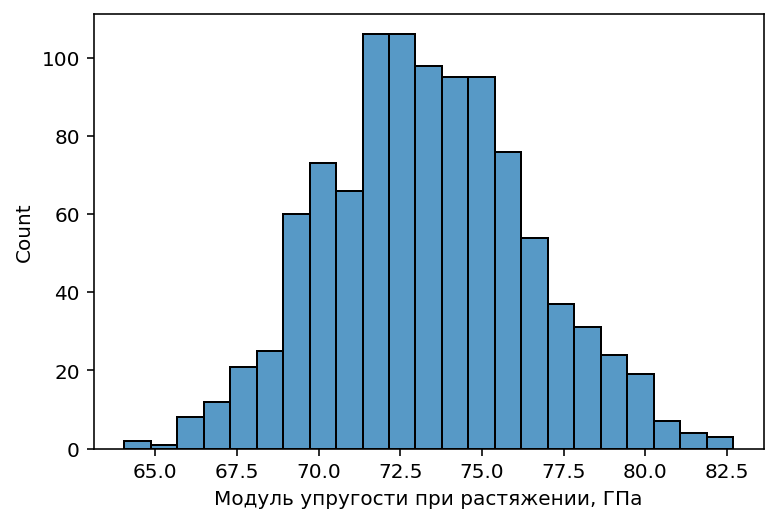

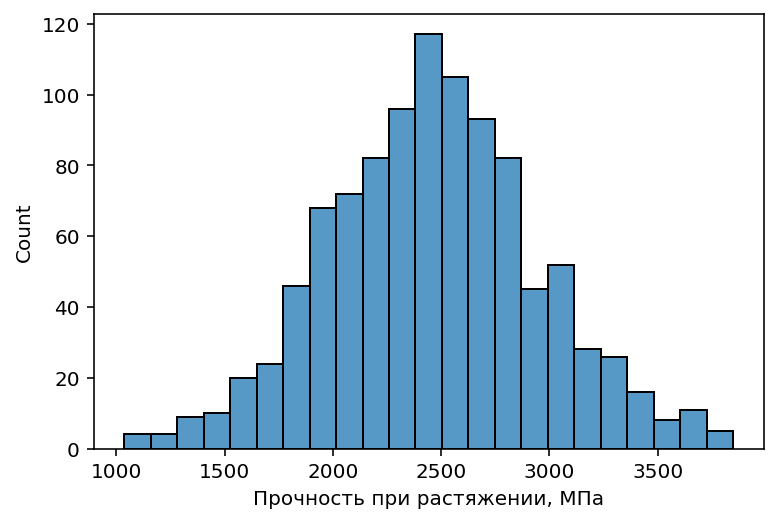

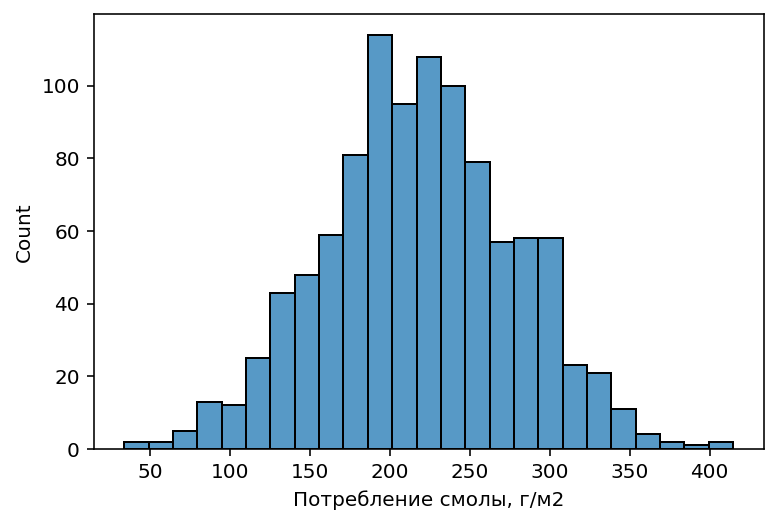

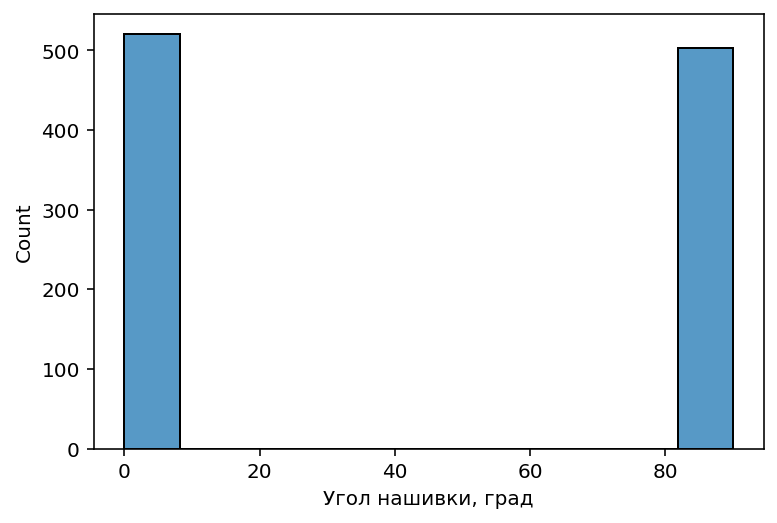

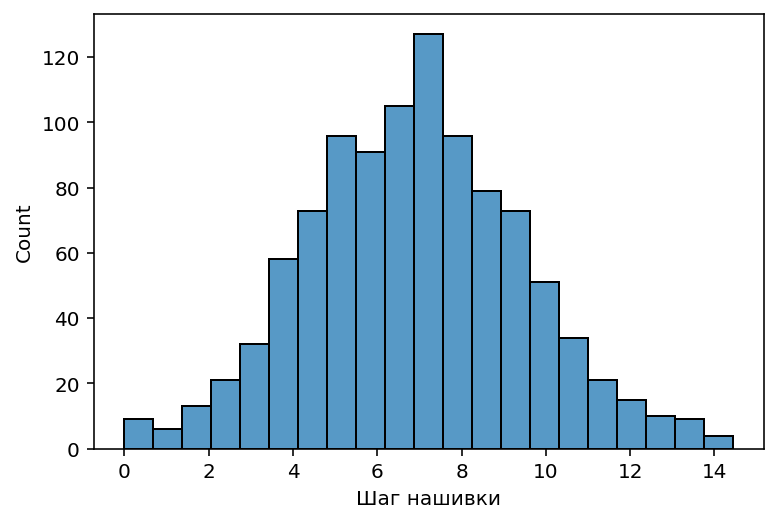

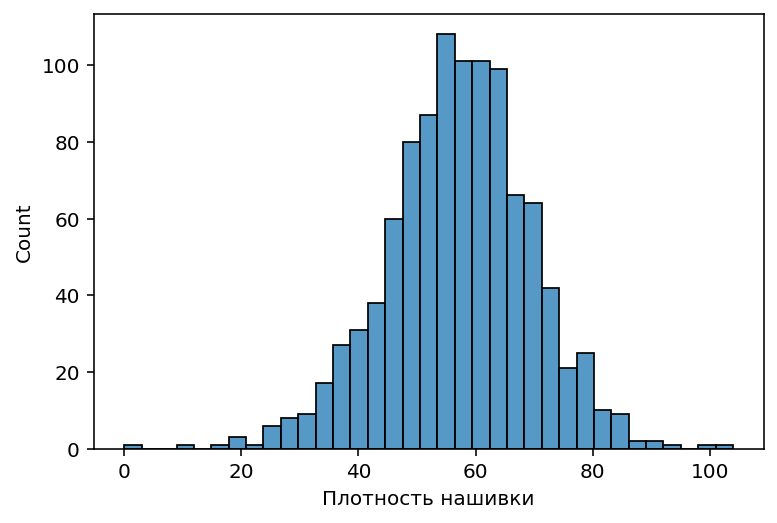

In [14]:
for col in df3_merged: # посмотрим на распределение числовых переменных
    plt.figure()
    sns.histplot(df3_merged[col])

In [ ]:
sns.pairplot(df3_merged)

Output hidden; open in https://colab.research.google.com to view.

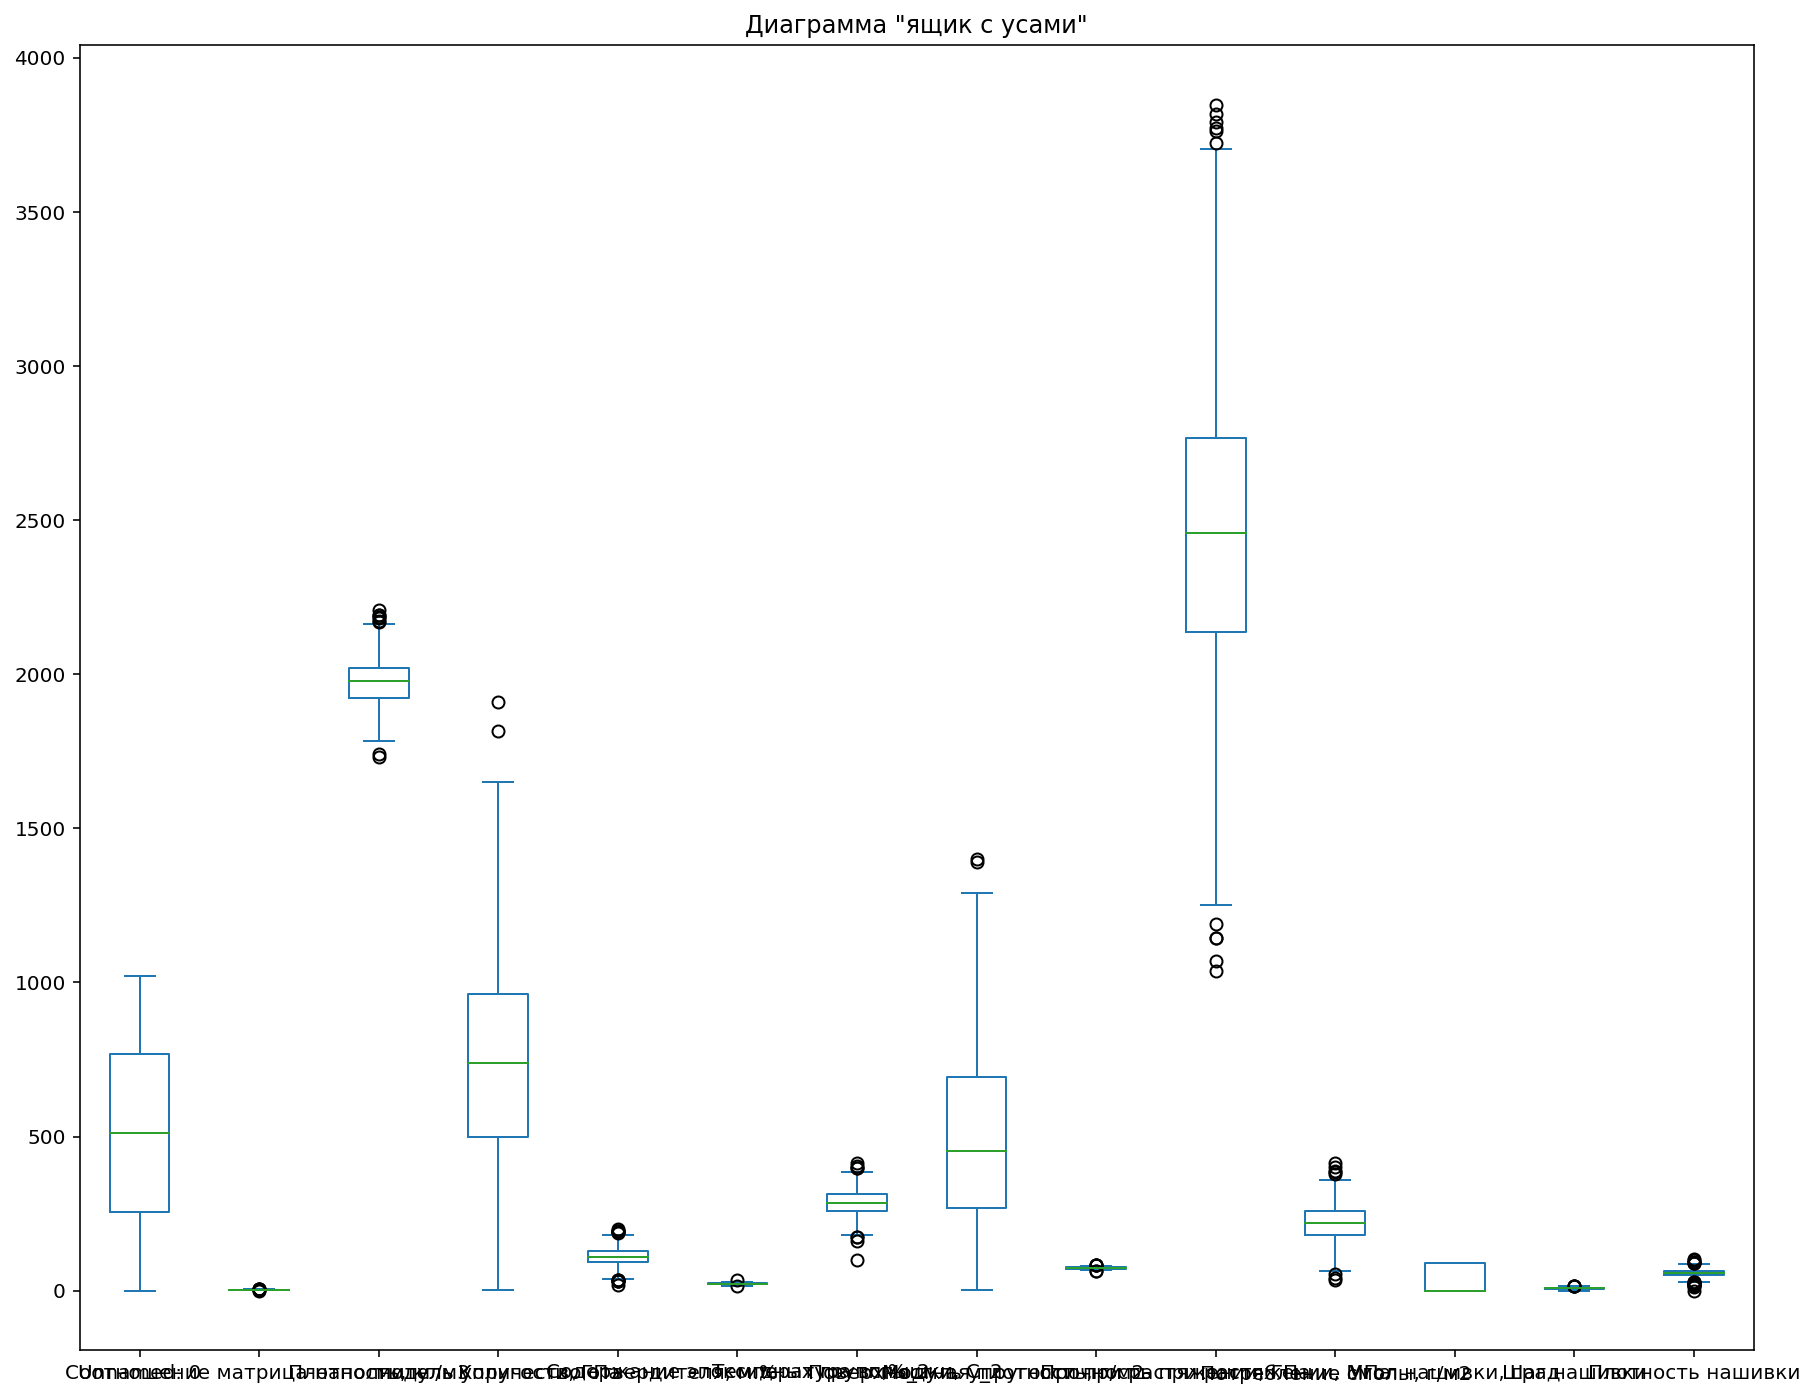

In [17]:
df3_merged.plot.box(title='Диаграмма "ящик с усами"')
plt.rcParams['figure.figsize']=10,15


<Axes: ylabel='Модуль упругости при растяжении, ГПа'>

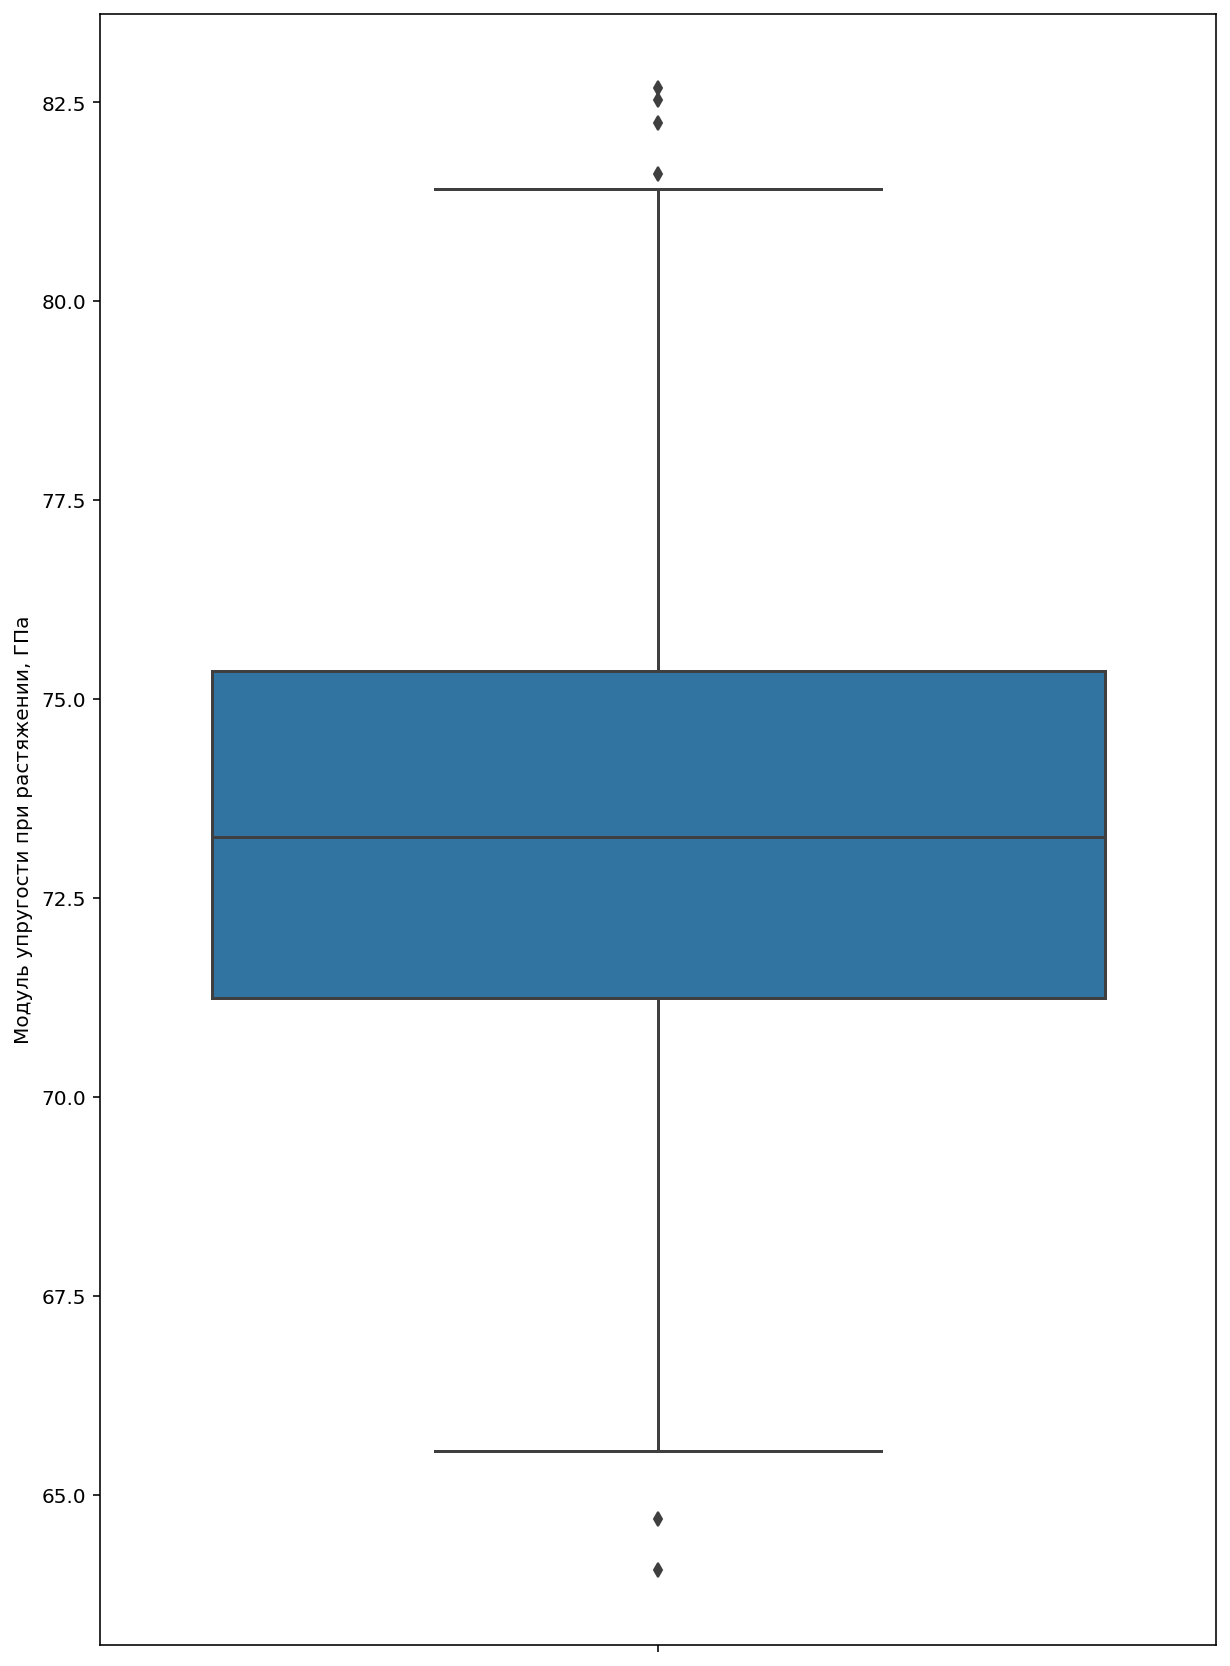

In [18]:
sns.boxplot(y = df3_merged['Модуль упругости при растяжении, ГПа']) 

<Axes: xlabel='Прочность при растяжении, МПа'>

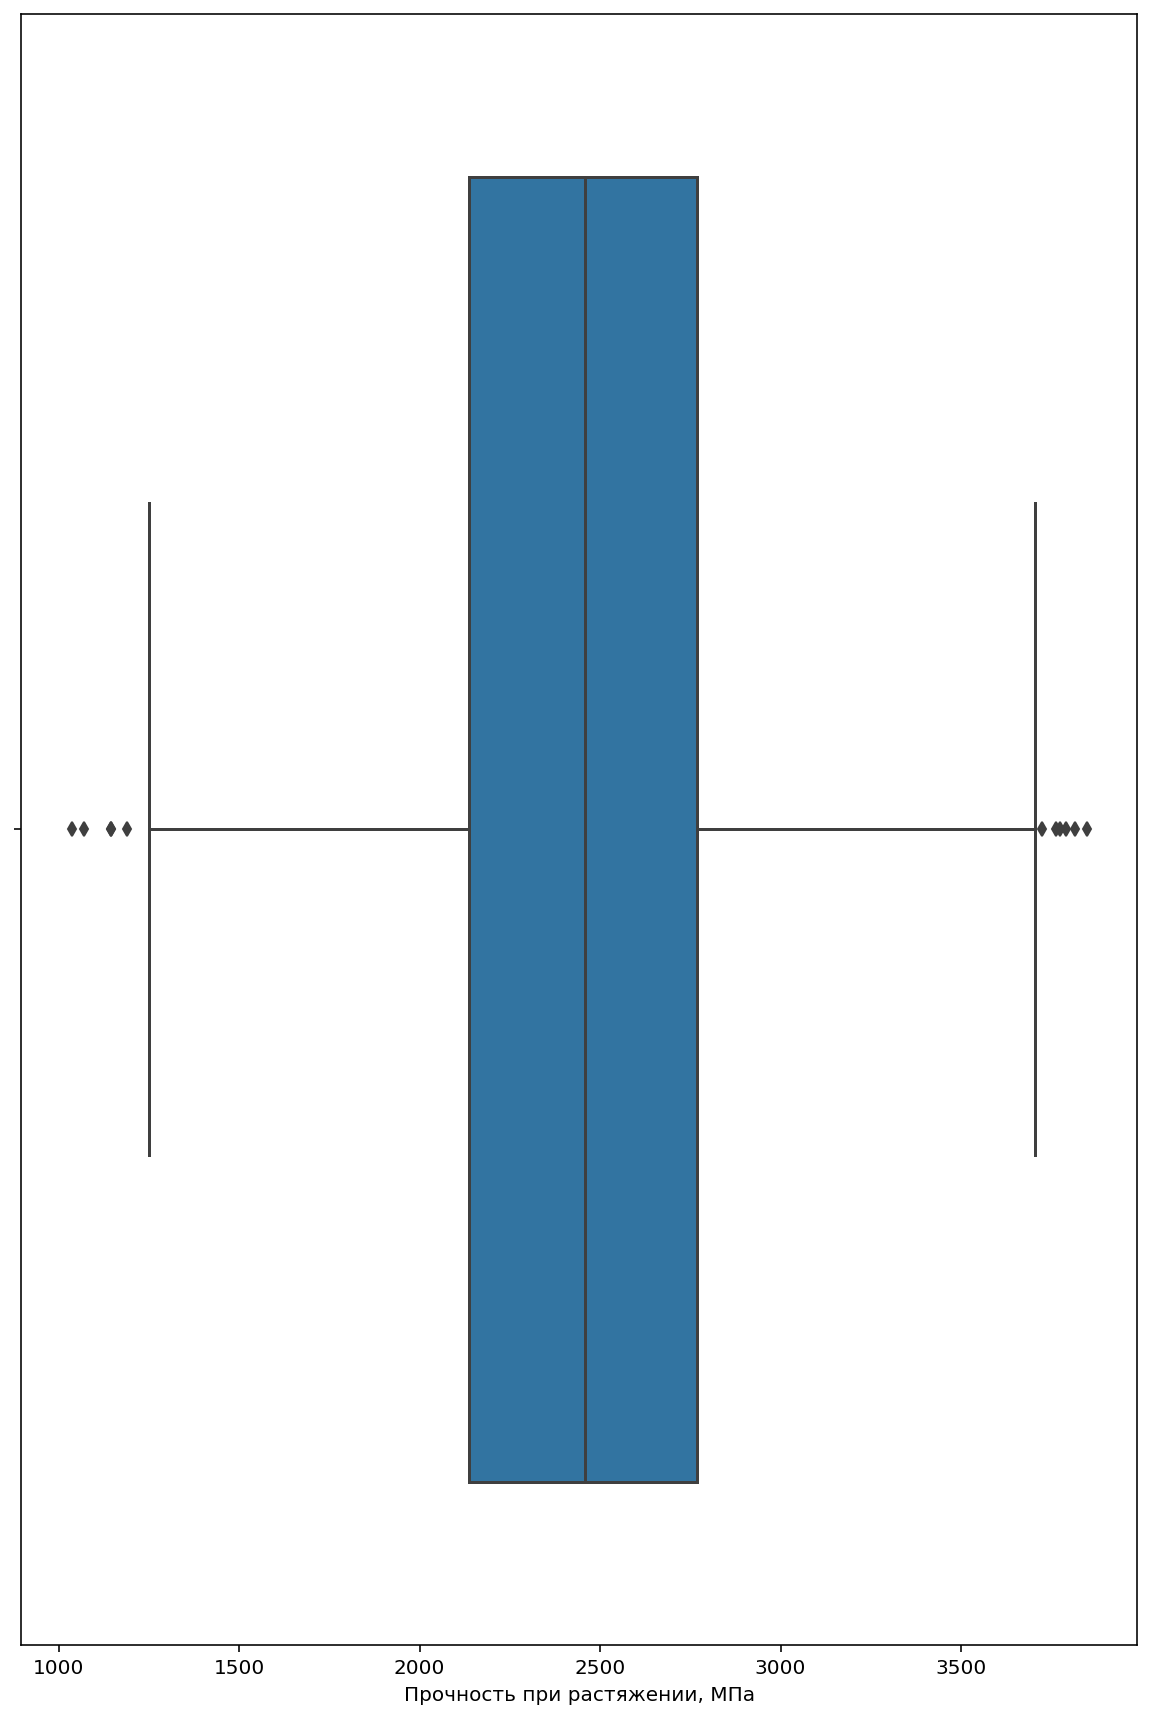

In [19]:
sns.boxplot(x = df3_merged['Прочность при растяжении, МПа']) 

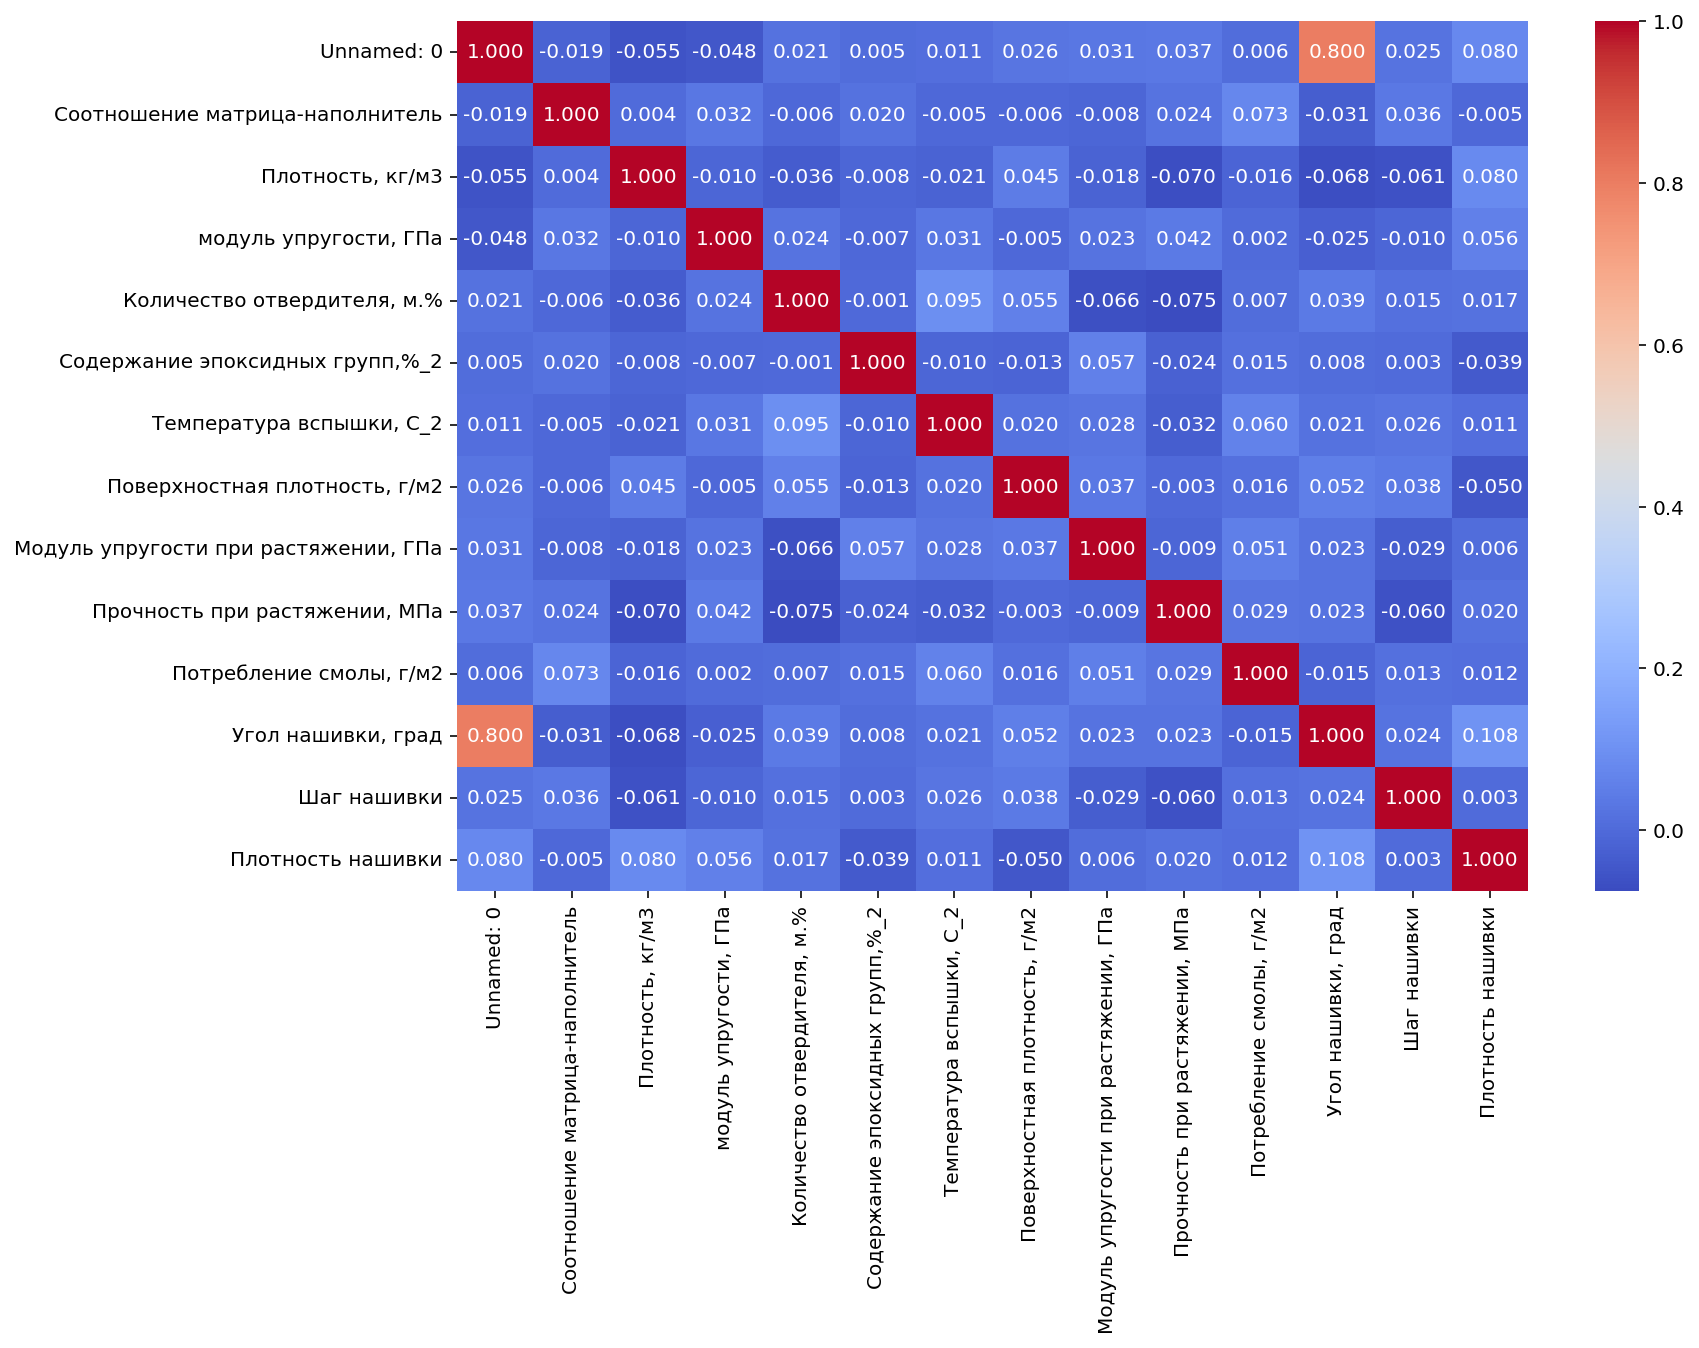

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df3_merged.corr(), annot=True, fmt='.3f', cmap = 'coolwarm', ax=ax);

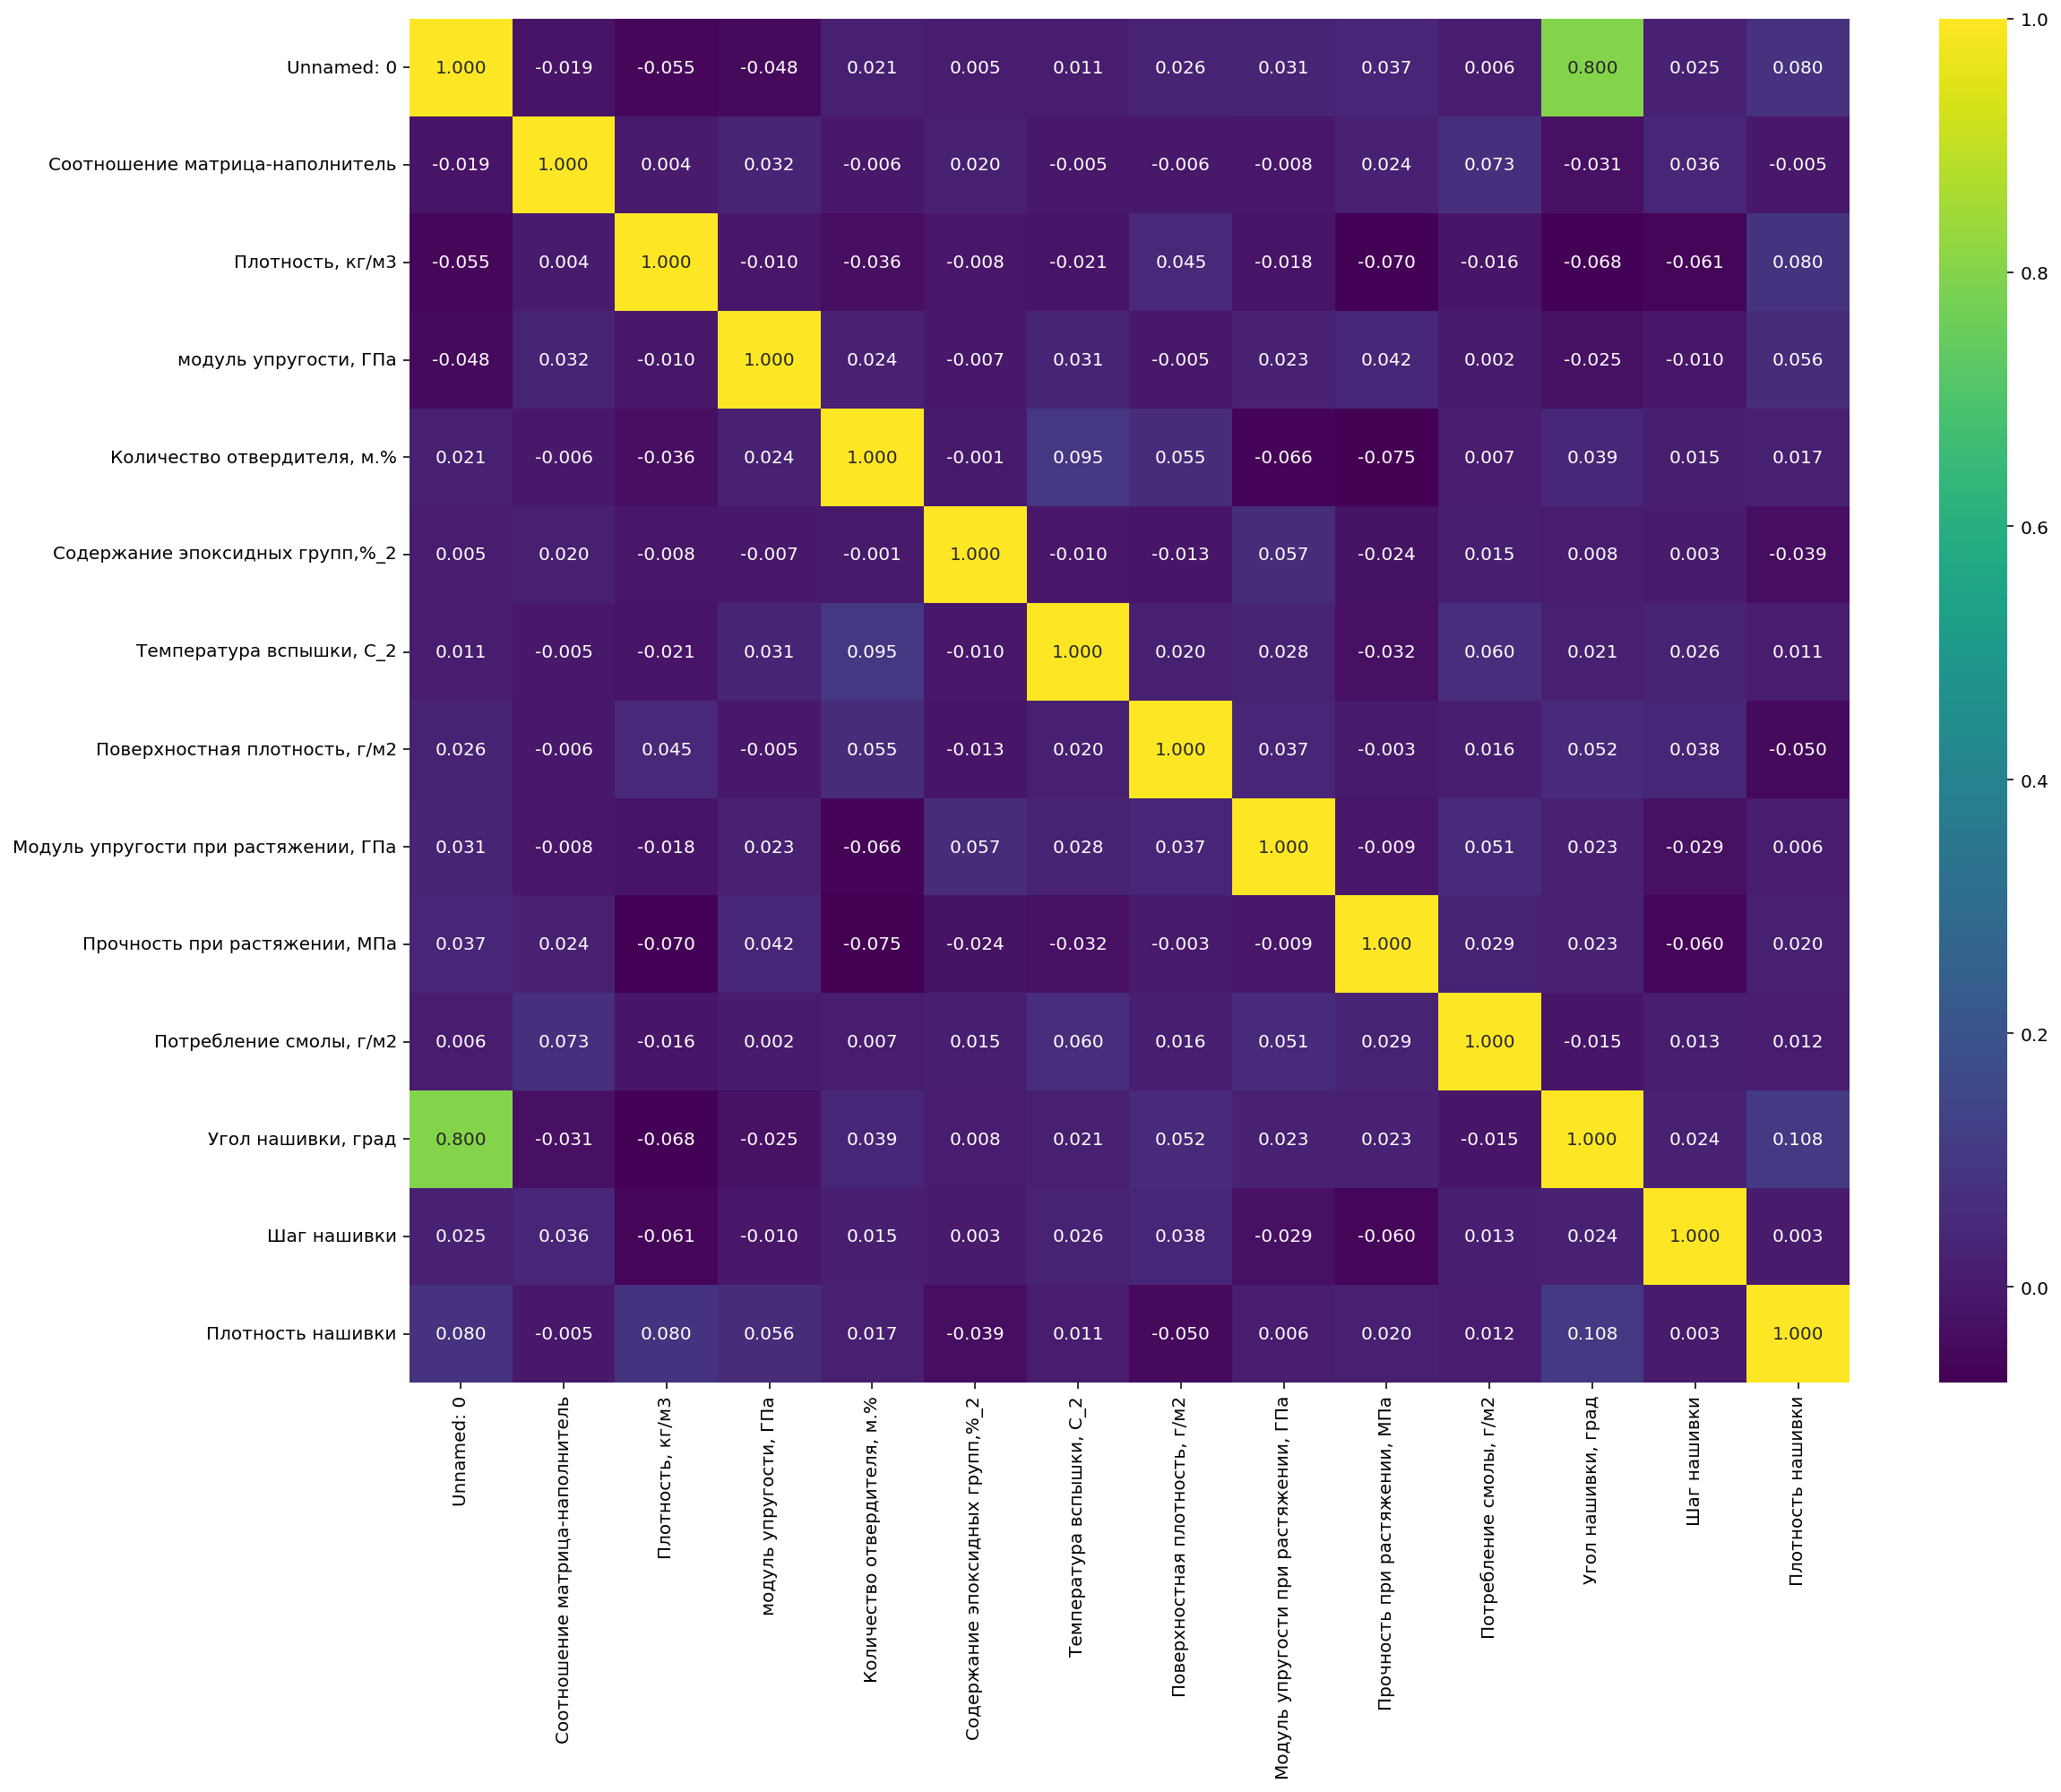

In [21]:
fig, ax = plt.subplots(figsize=(18, 14))
sns.heatmap(df3_merged.corr(), annot=True, fmt='.3f', cmap = 'viridis', ax=ax);

In [28]:
#получим среднее и медианное значения данных в колонках
mean_and_50 = df3_merged.describe()
mean_and_50.loc[['mean', '50%']]
#в целом мы видим близкие друг к другу значения

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
mean,511.0,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
50%,511.0,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920


In [30]:
df3_merged.mean()

Unnamed: 0                               511.000000
Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [31]:
# Вычисляем коэффициенты ранговой корреляции Кендалла. Статистической зависимости не наблюдаем.?
df3_merged.corr(method = 'kendall')

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Unnamed: 0,1.000000,-0.005431,-0.029879,-0.032924,0.000752,0.000725,0.002238,0.019090,0.022863,0.020789,0.012673,0.653268,0.016090,0.046928
Соотношение матрица-наполнитель,-0.005431,1.000000,-0.003135,0.021247,0.001410,0.010180,-0.009480,-0.002060,-0.004157,0.011614,0.035145,-0.021395,0.022723,0.002788
"Плотность, кг/м3",-0.029879,-0.003135,1.000000,-0.008059,-0.021963,-0.007758,-0.019947,0.037302,-0.021151,-0.047426,-0.017079,-0.051525,-0.031220,0.052935
"модуль упругости, ГПа",-0.032924,0.021247,-0.008059,1.000000,0.022382,0.002351,0.021028,-0.000442,0.005458,0.022959,0.005169,-0.031695,-0.008305,0.049347
"Количество отвердителя, м.%",0.000752,0.001410,-0.021963,0.022382,1.000000,0.000010,0.059034,0.033110,-0.043140,-0.046507,-0.003677,0.024690,0.006232,0.016607
"Содержание эпоксидных групп,%_2",0.000725,0.010180,-0.007758,0.002351,0.000010,1.000000,-0.002170,-0.006859,0.041994,-0.013441,0.009756,0.004668,-0.004539,-0.021968
"Температура вспышки, С_2",0.002238,-0.009480,-0.019947,0.021028,0.059034,-0.002170,1.000000,0.017196,0.016481,-0.019106,0.035313,0.017880,0.029552,0.005268
"Поверхностная плотность, г/м2",0.019090,-0.002060,0.037302,-0.000442,0.033110,-0.006859,0.017196,1.000000,0.024051,-0.005099,-0.004446,0.045452,0.025514,-0.022320
"Модуль упругости при растяжении, ГПа",0.022863,-0.004157,-0.021151,0.005458,-0.043140,0.041994,0.016481,0.024051,1.000000,-0.006599,0.034814,0.022431,-0.010024,-0.002600
"Прочность при растяжении, МПа",0.020789,0.011614,-0.047426,0.022959,-0.046507,-0.013441,-0.019106,-0.005099,-0.006599,1.000000,0.013580,0.020609,-0.048049,0.009821


In [32]:
#Вычисляем коэффициенты корреляции Пирсона. Статистической зависимости не наблюдаем.
df3_merged.corr(method ='pearson')

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Unnamed: 0,1.000000,-0.018560,-0.054704,-0.048318,0.020763,0.004583,0.011248,0.026010,0.030769,0.036775,0.006488,0.799695,0.024507,0.079529
Соотношение матрица-наполнитель,-0.018560,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",-0.054704,0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",-0.048318,0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",0.020763,-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.004583,0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",0.011248,-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",0.026010,-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",0.030769,-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.036775,0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604


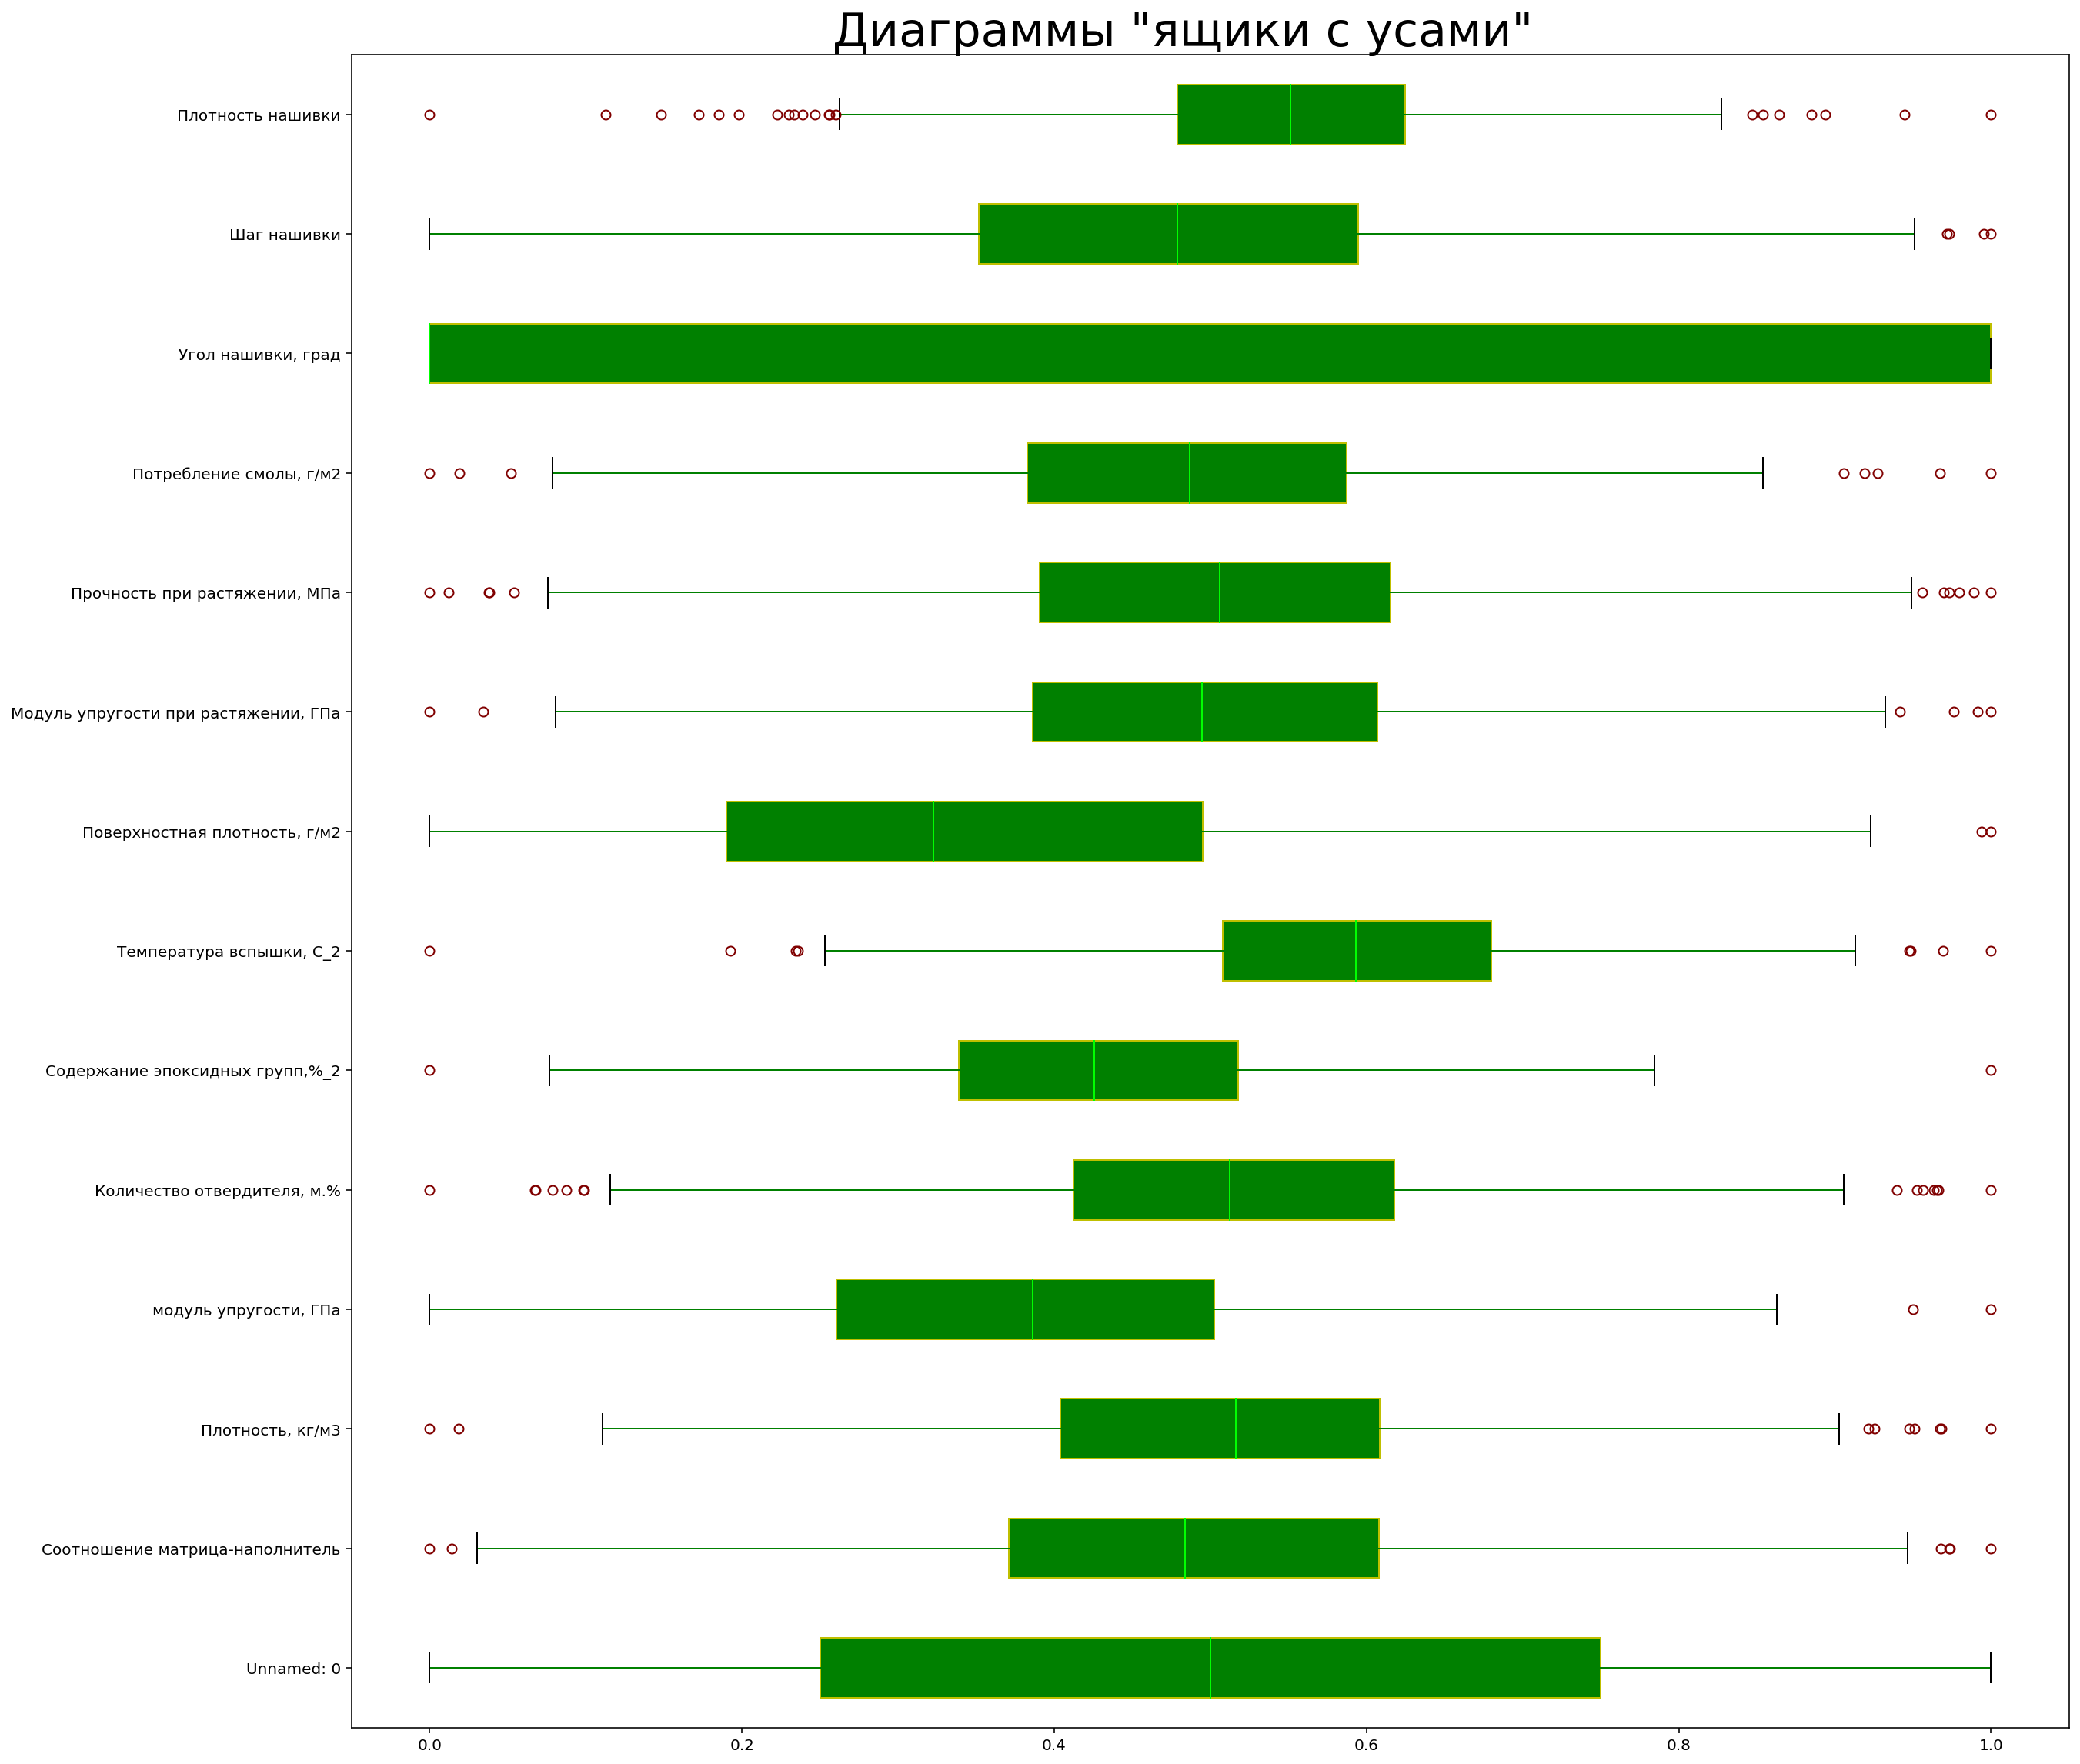

In [39]:
# "Ящики с усами"(боксплоты) (первый вариант)
scaler = MinMaxScaler()
scaler.fit(df3_merged)
plt.figure(figsize = (20, 20))
plt.suptitle('Диаграммы "ящики с усами"', y = 0.9 ,
             fontsize = 30)
plt.boxplot(pd.DataFrame(scaler.transform(df3_merged)), labels = df3_merged.columns,patch_artist = True, meanline = True, vert = False, boxprops = dict(facecolor = 'g', color = 'y'),medianprops = dict(color = 'lime'), whiskerprops = dict(color="g"), capprops = dict(color = "black"), flierprops = dict(color = "y", markeredgecolor = "maroon"))
plt.show()

In [41]:
y = df3_merged['Модуль упругости при растяжении, ГПа']
x = df3_merged

In [42]:
x

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [43]:
y

0       70.000000
1       70.000000
2       70.000000
3       70.000000
4       70.000000
          ...    
1018    73.090961
1019    72.920827
1020    74.734344
1021    74.042708
1022    74.309704
Name: Модуль упругости при растяжении, ГПа, Length: 1023, dtype: float64

In [44]:
np.array(x)

array([[0.00000000e+00, 1.85714286e+00, 2.03000000e+03, ...,
        0.00000000e+00, 4.00000000e+00, 5.70000000e+01],
       [1.00000000e+00, 1.85714286e+00, 2.03000000e+03, ...,
        0.00000000e+00, 4.00000000e+00, 6.00000000e+01],
       [2.00000000e+00, 1.85714286e+00, 2.03000000e+03, ...,
        0.00000000e+00, 4.00000000e+00, 7.00000000e+01],
       ...,
       [1.02000000e+03, 3.28060448e+00, 1.97237287e+03, ...,
        9.00000000e+01, 4.16115398e+00, 6.76296842e+01],
       [1.02100000e+03, 3.70535121e+00, 2.06679977e+03, ...,
        9.00000000e+01, 6.31320073e+00, 5.82610739e+01],
       [1.02200000e+03, 3.80802004e+00, 1.89041347e+03, ...,
        9.00000000e+01, 6.07890159e+00, 7.74344680e+01]])

In [45]:
np.array(y)

array([70.        , 70.        , 70.        , ..., 74.7343437 ,
       74.04270842, 74.309704  ])

Линейная регрессия

In [46]:
x_train, x_test, y_train, y_test = train_test_split(df3_merged.drop(['Модуль упругости при растяжении, ГПа'], axis=1), 
                                                    df3_merged['Модуль упругости при растяжении, ГПа'],
                                                    test_size=0.3
                                                   )

In [47]:
print(x_train.shape, x_test.shape)

(716, 13) (307, 13)


In [48]:
x_train.describe()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,513.648045,2.916111,1976.559577,748.102954,110.565783,22.244890,287.426045,487.144185,2457.535626,218.499581,44.120112,6.948379,57.242969
std,296.317179,0.929919,74.563575,334.331935,28.587083,2.367557,40.597211,288.193904,494.102445,59.302864,45.022848,2.568266,12.411766
min,1.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,173.484920,0.603740,1036.856605,33.803026,0.000000,0.145034,17.934408
25%,260.500000,2.275034,1925.549159,507.572518,92.479631,20.618250,259.420868,268.556966,2108.762397,179.812213,0.000000,5.055332,49.718227
50%,515.500000,2.893816,1977.797890,744.404008,110.244021,22.190261,286.396906,450.413988,2446.646729,219.336333,0.000000,6.938000,57.300796
75%,774.250000,3.553568,2021.364646,966.566491,130.164272,23.948788,314.998600,698.027815,2755.169485,259.795104,90.000000,8.654067,65.040740
max,1020.000000,5.591742,2207.773481,1911.536477,198.953207,28.955094,413.273418,1399.542362,3848.436732,414.590628,90.000000,14.440522,103.988901


In [49]:
scl = RobustScaler()
x_train_scl = scl.fit_transform(x_train)
x_test_scl = scl.transform(x_test)

In [50]:
model = ElasticNet(random_state=17)
cv = KFold(n_splits=7) # схема для кросс-валидации

cv_score = cross_val_score(model, 
                           x_train, y_train, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, n_jobs=-1) # прогоняем модель на кросс-валидации
print('MAE на кросс-валидации: %.3f+-%.3f'% (abs(np.mean(cv_score)), np.std(cv_score)))

MAE на кросс-валидации: 2.585+-0.192


In [51]:
params = {'alpha': (0.1, 0.5, 1), 
          'l1_ratio': (0.1, 0.5, 0.9)}
model_grid = GridSearchCV(model, 
                          param_grid=params, 
                          scoring='neg_mean_absolute_error', 
                          n_jobs=-1, cv=cv)
model_grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=False),
             estimator=ElasticNet(random_state=17), n_jobs=-1,
             param_grid={'alpha': (0.1, 0.5, 1), 'l1_ratio': (0.1, 0.5, 0.9)},
             scoring='neg_mean_absolute_error')

In [52]:
print('Лучшая модель на кросс-валидации с параметрами {} и MAE {}'.format(model_grid.best_params_, 
                                                                        abs(model_grid.best_score_)))

best_model = model_grid.best_estimator_

Лучшая модель на кросс-валидации с параметрами {'alpha': 1, 'l1_ratio': 0.9} и MAE 2.582634101684564


In [53]:
best_model.fit(x_train_scl, y_train)
print('MAE на тестовой выборке: %.3f' % mean_absolute_error(y_test, best_model.predict(x_test_scl)))

MAE на тестовой выборке: 2.373


In [54]:
y = df3_merged['Прочность при растяжении, МПа']
x = df3_merged

In [55]:
x

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [57]:
y

0       3000.000000
1       3000.000000
2       3000.000000
3       3000.000000
4       3000.000000
           ...     
1018    2387.292495
1019    2360.392784
1020    2662.906040
1021    2071.715856
1022    2856.328932
Name: Прочность при растяжении, МПа, Length: 1023, dtype: float64

In [58]:
np.array(x)

array([[0.00000000e+00, 1.85714286e+00, 2.03000000e+03, ...,
        0.00000000e+00, 4.00000000e+00, 5.70000000e+01],
       [1.00000000e+00, 1.85714286e+00, 2.03000000e+03, ...,
        0.00000000e+00, 4.00000000e+00, 6.00000000e+01],
       [2.00000000e+00, 1.85714286e+00, 2.03000000e+03, ...,
        0.00000000e+00, 4.00000000e+00, 7.00000000e+01],
       ...,
       [1.02000000e+03, 3.28060448e+00, 1.97237287e+03, ...,
        9.00000000e+01, 4.16115398e+00, 6.76296842e+01],
       [1.02100000e+03, 3.70535121e+00, 2.06679977e+03, ...,
        9.00000000e+01, 6.31320073e+00, 5.82610739e+01],
       [1.02200000e+03, 3.80802004e+00, 1.89041347e+03, ...,
        9.00000000e+01, 6.07890159e+00, 7.74344680e+01]])

In [59]:
np.array(y)

array([3000.        , 3000.        , 3000.        , ..., 2662.90603955,
       2071.71585567, 2856.32893217])

In [60]:
x_train, x_test, y_train, y_test = train_test_split(df3_merged.drop(['Прочность при растяжении, МПа'], axis=1), 
                                                    df3_merged['Прочность при растяжении, МПа'],
                                                    test_size=0.3,
                                                    random_state=20,
                                                    shuffle=True
                                                   )                                              

In [61]:
print(x_train.shape, x_test.shape)

(716, 13) (307, 13)


In [62]:
print('Размер тренировочного датасета: {}\nРазмер тестового датасета:{}'.format(x_train.shape, x_test.shape))

Размер тренировочного датасета: (716, 13)
Размер тестового датасета:(307, 13)


In [63]:
x_train.describe()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,511.825419,2.926423,1977.279988,734.464235,110.502357,22.275159,285.526083,481.268084,73.410210,218.290215,44.371508,6.833138,57.243505
std,297.767754,0.916381,73.736059,329.816673,27.825565,2.434302,42.076723,279.890415,3.093227,57.911754,45.027065,2.541945,12.307298
min,0.000000,0.389403,1740.657496,4.339154,29.956150,14.254985,100.000000,1.894093,64.696400,53.548916,0.000000,0.000000,0.000000
25%,246.750000,2.284571,1926.522375,490.211484,93.004468,20.555086,258.714220,266.205564,71.336763,178.472630,0.000000,4.999163,50.046997
50%,508.500000,2.903269,1979.653238,718.717441,110.003401,22.275613,285.853960,450.869535,73.425965,218.388715,0.000000,6.789790,57.328584
75%,769.250000,3.565188,2024.158128,957.077868,129.226754,24.026221,312.724285,691.528426,75.465616,256.222148,90.000000,8.569952,64.603149
max,1022.000000,5.425139,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,402.163809,90.000000,14.376451,98.202603


In [64]:
scl = RobustScaler()
x_train_scl = scl.fit_transform(x_train)
x_test_scl = scl.transform(x_test)

In [65]:
model = ElasticNet(random_state=17)
cv = KFold(n_splits=7) # схема для кросс-валидации

cv_score = cross_val_score(model, 
                           x_train, y_train, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, n_jobs=-1) # прогоняем модель на кросс-валидации
print('MAE на кросс-валидации: %.3f+-%.3f'% (abs(np.mean(cv_score)), np.std(cv_score)))

MAE на кросс-валидации: 388.006+-26.863


In [66]:
params = {'alpha': (0.1, 0.5, 1), 
          'l1_ratio': (0.1, 0.5, 0.9)}
model_grid = GridSearchCV(model, 
                          param_grid=params, 
                          scoring='neg_mean_absolute_error', 
                          n_jobs=-1, cv=cv)
model_grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=False),
             estimator=ElasticNet(random_state=17), n_jobs=-1,
             param_grid={'alpha': (0.1, 0.5, 1), 'l1_ratio': (0.1, 0.5, 0.9)},
             scoring='neg_mean_absolute_error')

In [67]:
print('Лучшая модель на кросс-валидации с параметрами {} и MAE {}'.format(model_grid.best_params_, 
                                                                        abs(model_grid.best_score_)))

best_model = model_grid.best_estimator_

Лучшая модель на кросс-валидации с параметрами {'alpha': 1, 'l1_ratio': 0.1} и MAE 387.8189612028549


In [68]:
best_model.fit(x_train_scl, y_train)
print('MAE на тестовой выборке: %.3f' % mean_absolute_error(y_test, best_model.predict(x_test_scl)))

MAE на тестовой выборке: 382.271


Дерево решений

In [69]:
df3_merged = pd.read_excel('X_bp.xlsx', header=None) # загружаем данные
df3_merged.columns = ['1_'+str(i) for i in range(df3_merged.shape[1]-1)] + ['Прочность при растяжении, МПа'] # пронумеруем признаки и обозначим целевой признак


In [70]:
df3_merged

,1_0,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,"Прочность при растяжении, МПа"
0,NaN,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
1,0.0,1.857143,2030,738.736842,30,22.267857,100,210,70,3000,220
2,1.0,1.857143,2030,738.736842,50,23.75,284.615385,210,70,3000,220
3,2.0,1.857143,2030,738.736842,49.9,33,284.615385,210,70,3000,220
4,3.0,1.857143,2030,738.736842,129,21.25,300,210,70,3000,220
...,...,...,...,...,...,...,...,...,...,...,...
1019,1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.1987,73.090961,2387.292495,125.007669
1020,1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.66083,72.920827,2360.392784,117.730099
1021,1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.90604,236.606764
1022,1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.77984,641.468152,74.042708,2071.715856,197.126067


In [71]:
x_train, x_test, y_train, y_test = train_test_split(df3_merged.drop(['Прочность при растяжении, МПа'], axis=1), 
                                                    df3_merged['Прочность при растяжении, МПа'],
                                                    test_size=0.3,
                                                    random_state=20,
                                                    shuffle=True
                                                   )

In [72]:
print('Размер тренировочной выборки: {}\nРазмер тестовой выборки: {}'.format(x_train.shape, x_test.shape))

Размер тренировочной выборки: (716, 10)
Размер тестовой выборки: (308, 10)


 нейронная сеть 


In [74]:
df = pd.read_excel('/content/X_bp.xlsx')
df.head(5)

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [75]:
for col in df.select_dtypes(include='O').columns: #  для всех категориальных признаков
    print(col)
    print(df[col].value_counts(),'\n')

In [83]:
df.drop(['Количество отвердителя, м.%', 'Плотность, кг/м3', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'модуль упругости, ГПа', 'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2'], axis=1)

,Unnamed: 0,Соотношение матрица-наполнитель,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
0,0,1.857143,70.000000,3000.000000
1,1,1.857143,70.000000,3000.000000
2,2,1.857143,70.000000,3000.000000
3,3,1.857143,70.000000,3000.000000
4,4,2.771331,70.000000,3000.000000
...,...,...,...,...
1018,1018,2.271346,73.090961,2387.292495
1019,1019,3.444022,72.920827,2360.392784
1020,1020,3.280604,74.734344,2662.906040
1021,1021,3.705351,74.042708,2071.715856


In [84]:
df.isna().sum()

Unnamed: 0                              0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

In [85]:
df.value_counts()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  Температура вспышки, С_2  Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  Потребление смолы, г/м2
0           1.857143                         2030.000000       738.736842             30.000000                    22.267857                        100.000000                210.000000                     70.000000                             3000.000000                    220.000000                 1
687         4.545326                         1820.140146       1099.171441            109.703767                   26.172367                        290.216923                488.873301                     75.134602                             2431.940802                    189.299416                 1
674         3.858755                         2053.292814       985.791212             59.207283 

In [86]:
num_cols = ['Соотношение матрица-наполнитель', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Соотношение матрица-наполнитель'], axis=1),
                                                    df['Соотношение матрица-наполнитель'],
                                                    test_size=0.3
                                                   )

transformer = PowerTransformer(standardize=True)
x_train = transformer.fit_transform(x_train) # нормализируем и стандартизируем выборку
x_test = transformer.transform(x_test) # нормализируем и стандартизируем выборку
y_train = np.array(y_train)
y_test = np.array(y_test)

In [88]:
x_train.shape, x_test.shape

((716, 10), (307, 10))

Бинарная и множественная классификация

In [91]:
input_ = keras.layers.Input(shape=(x_train.shape[1],)) # входной слой
x = keras.layers.Dense(30, activation='relu')(input_) # полносвязный слой
x = keras.layers.Dense(20, activation='relu')(x) # полносвязный слой
output_ = keras.layers.Dense(1, activation='sigmoid')(x) # выходной слой

model = keras.models.Model(input_, output_) # определем вход и выход моедли

model.compile(loss = 'binary_crossentropy', # определяем метрики и алгоритм оптимизации
              optimizer = 'adam',
              metrics = 'accuracy'
             )

history = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=30, 
                    validation_split=0.3,
                    callbacks=keras.callbacks.EarlyStopping(patience=5)
                   ) # сохраняем историю тренировки

Epoch 1/100
17/17 [==============================] - 1s 16ms/step - loss: 1.2034 - accuracy: 0.0000e+00 - val_loss: 0.4456 - val_accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: -0.1489 - accuracy: 0.0000e+00 - val_loss: -0.7465 - val_accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: -1.4623 - accuracy: 0.0000e+00 - val_loss: -2.0654 - val_accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: -2.9913 - accuracy: 0.0000e+00 - val_loss: -3.6984 - val_accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: -4.8942 - accuracy: 0.0000e+00 - val_loss: -5.7099 - val_accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: -7.2548 - accuracy: 0.0000e+00 - val_loss: -8.2320 - val_accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: -10.2931 - accuracy: 0

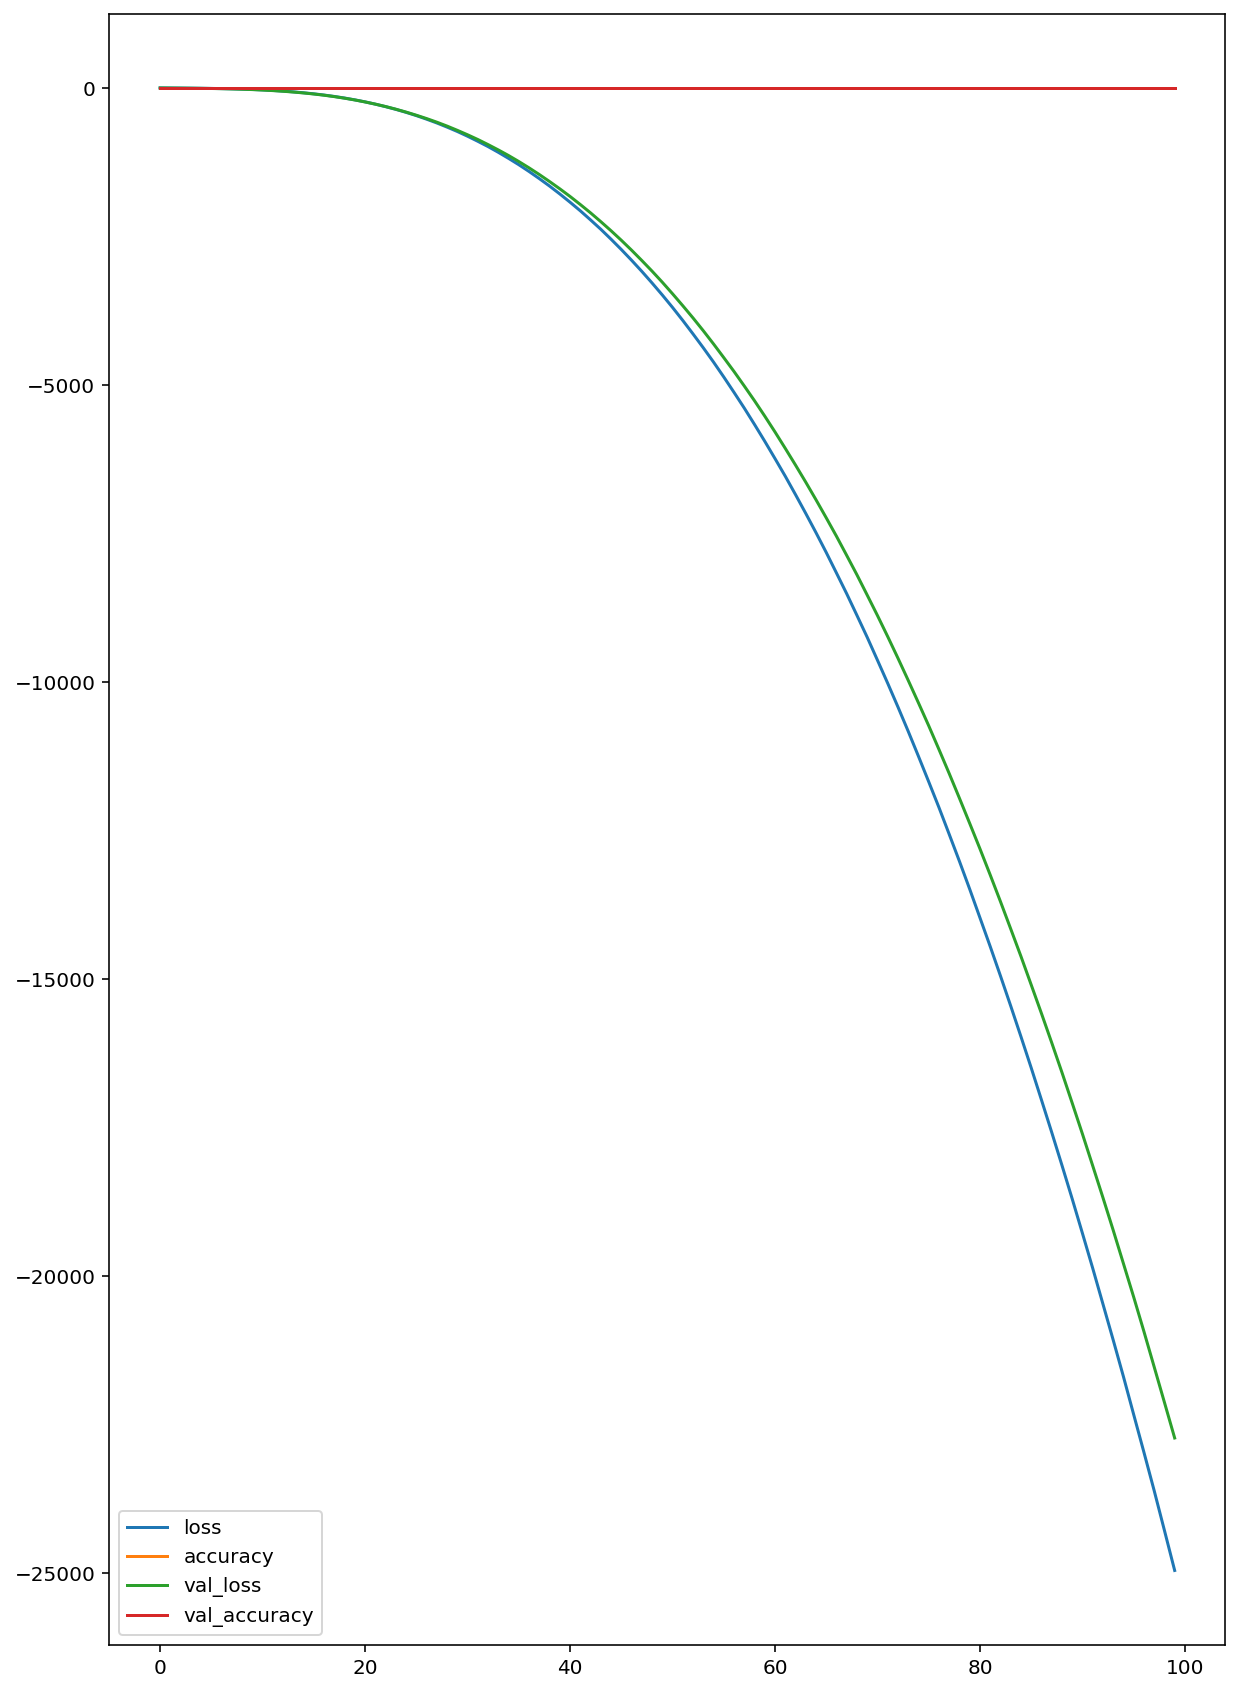

In [96]:
pd.DataFrame(history.history).plot(); # модель постепенно переобучается

In [98]:
print('MAE на тестовой выборке: %.3f' %mean_absolute_error(y_test, model.predict(x_test)))

10/10 [==============================] - 0s 4ms/step
MAE на тестовой выборке: 1.867


Нейронная сеть для задач регрессии

In [99]:
input_ = keras.layers.Input(shape=(x_train.shape[1],)) # входной слой
x = keras.layers.Dense(400, activation='relu')(input_) # полносвязный слой
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(200, activation='relu')(x) # полносвязный слой
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(100, activation='relu')(x) # полносвязный слой
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(50, activation='relu')(x) # полносвязный слой
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(20, activation='relu')(x) # полносвязный слой
output_ = keras.layers.Dense(1)(x) # выходной слой

model = keras.models.Model(input_, output_) # определем въод и выход моедли

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           patience=6) # ранняя остановка
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                              factor=0.25, 
                                              patience=3, 
                                              verbose=1) # редактирование скорости обучения

model.compile(loss = 'mse', # определяем метрики и алгоритм оптимизации
              optimizer = 'adam',
              metrics = ['mae']
             )

In [100]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=100,
                    batch_size=70,
                    validation_split=0.2,
                    callbacks = [early_stop, reduce_lr],
                    shuffle=False
                   ) # сохраняем историю тренировки

Epoch 1/100
9/9 [==============================] - 2s 36ms/step - loss: 7.9988 - mae: 2.6619 - val_loss: 3.8939 - val_mae: 1.7285 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 0s 15ms/step - loss: 2.4476 - mae: 1.2606 - val_loss: 2.1884 - val_mae: 1.1812 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 2.0813 - mae: 1.1356 - val_loss: 1.9432 - val_mae: 1.1179 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 1.8224 - mae: 1.0989 - val_loss: 1.3943 - val_mae: 0.9304 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 1.5616 - mae: 1.0025 - val_loss: 1.4631 - val_mae: 0.9435 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 1.5122 - mae: 0.9608 - val_loss: 1.3741 - val_mae: 0.9284 - lr: 0.0010
Epoch 7/100
9/9 [==============================] - 0s 13ms/step - loss: 1.4643 - mae: 0.9687 - val_loss: 1.3379 - val_mae: 0.9094 - lr: 0.0010

<Axes: >

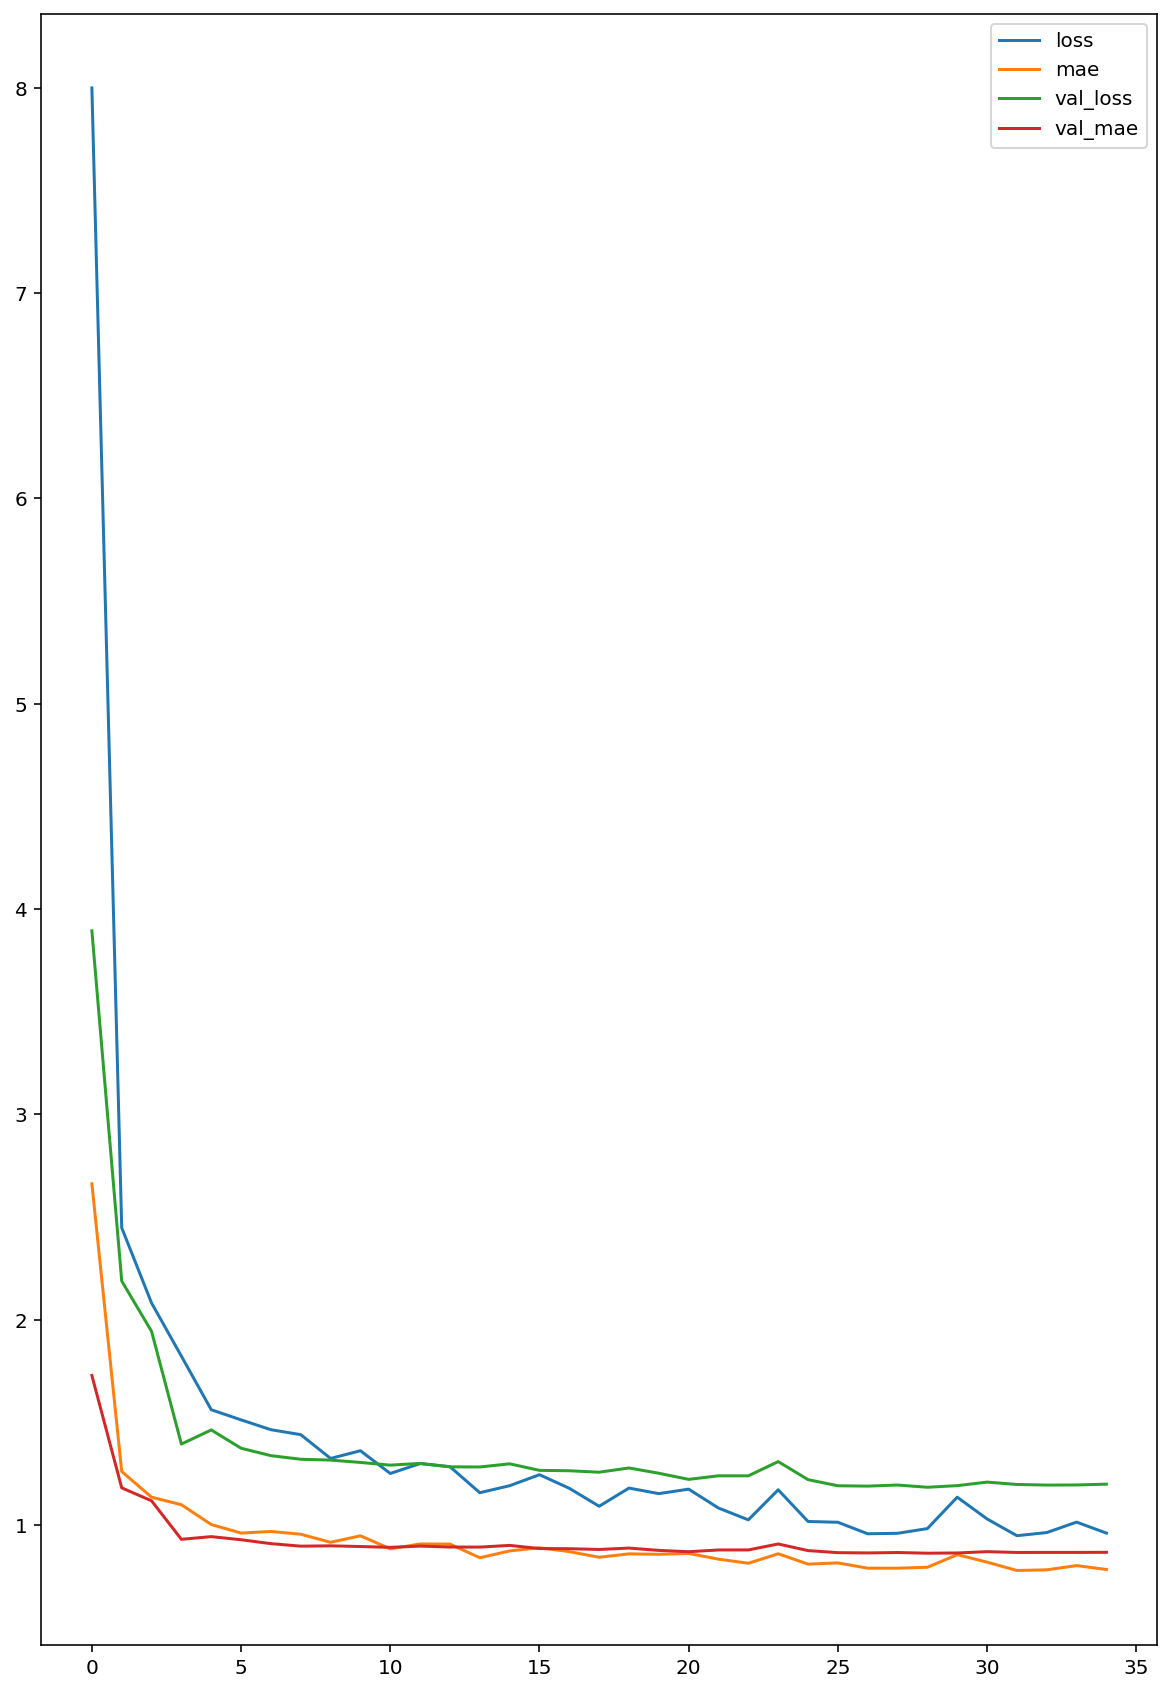

In [101]:
pd.DataFrame(history.history).iloc[:, :4].plot()

In [103]:
print('MAE на тестовой выборке: %.3f' %mean_absolute_error(y_test, model.predict(x_test)))

10/10 [==============================] - 0s 3ms/step
MAE на тестовой выборке: 0.791


Рекомендательные системы

In [113]:
#Прогнозируем модуль упругости при растяжении, ГПа
#разбиваем на тестовую, тренировочную выборки, выделяя предикторы и целевые переменные
normalizer = Normalizer()
res = normalizer.fit_transform(df3_merged)
df3_merged_norm_n = pd.DataFrame(res, columns = df3_merged.columns)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    df3_merged_norm_n.loc[:, df3_merged_norm_n.columns != 'Модуль упругости при растяжении, ГПа'],
    df3_merged[['Модуль упругости при растяжении, ГПа']],
       test_size = 0.3,
    random_state = 42)

In [114]:
# Проверка правильности разбивки
df3_merged_norm_n.shape[0] - x_train.shape[0] - x_test.shape[0]

0

In [117]:
x_train_2.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
604,0.245406,0.001454,0.756809,0.138822,0.030500,0.010546,0.127087,0.003675,0.568464,0.065219,0.036567,0.004171,0.029960
227,0.083378,0.001075,0.736859,0.349166,0.056810,0.008882,0.108405,0.260829,0.491360,0.052345,0.000000,0.002433,0.015924
970,0.288194,0.000677,0.578311,0.299608,0.045067,0.006913,0.087147,0.083796,0.686090,0.062698,0.026740,0.001342,0.014340
497,0.146251,0.000888,0.611868,0.330203,0.031071,0.007410,0.079025,0.086214,0.690685,0.049106,0.000000,0.000215,0.024723
919,0.298321,0.000659,0.636458,0.296841,0.038829,0.007572,0.073736,0.027999,0.638376,0.024678,0.029215,0.002150,0.021736


In [116]:
y_train_2

,"Модуль упругости при растяжении, ГПа"
604,73.006935
227,69.215144
970,72.762976
497,70.199234
919,72.951915
...,...
106,68.166534
270,71.761063
860,72.558812
435,70.643900


In [118]:
y_train_2.shape

(716, 1)

In [119]:
# Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_2):
    return [np.mean(y_test_2) for _ in range(len(y_test_2))]
y_2_pred_mean = mean_model(y_test_2)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [120]:
#Результаты модели, выдающей среднее значение
mse_lin_elast2_mean = mean_squared_error(y_test_2, y_2_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y_test_2, y_2_pred_mean))
print("MSE for mean target: ", mse_lin_elast2_mean)
print("RMSE for mean target: ", np.sqrt(mse_lin_elast2_mean))

MAE for mean target:  2.5313035448559824
MSE for mean target:  9.934422413841746
RMSE for mean target:  3.1518918785138785


In [121]:
#построение модели и вузуализация метода случайный лес
rfr2 = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr2.fit(x_train_2, y_train_2.values)
y2_pred_forest = rfr2.predict(x_test_2)
mae_rfr2 = mean_absolute_error(y2_pred_forest, y_test_2)
mse_rfr_elast2 = mean_squared_error(y_test_2,y2_pred_forest)
print('Random Forest Regressor Results Train:')
print("Test score: {:.2f}".format(rfr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(mean_absolute_error(y_test_2, y2_pred_forest)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast2))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast2)))
print("Test score: {:.2f}".format(rfr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки

Random Forest Regressor Results Train:
Test score: 0.37
Random Forest Regressor Results:
RF_MAE:  3
RF_MSE: 10.71
RF_RMSE: 3.27
Test score: -0.08


<ipython-input-121-91635273b78a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr2.fit(x_train_2, y_train_2.values)


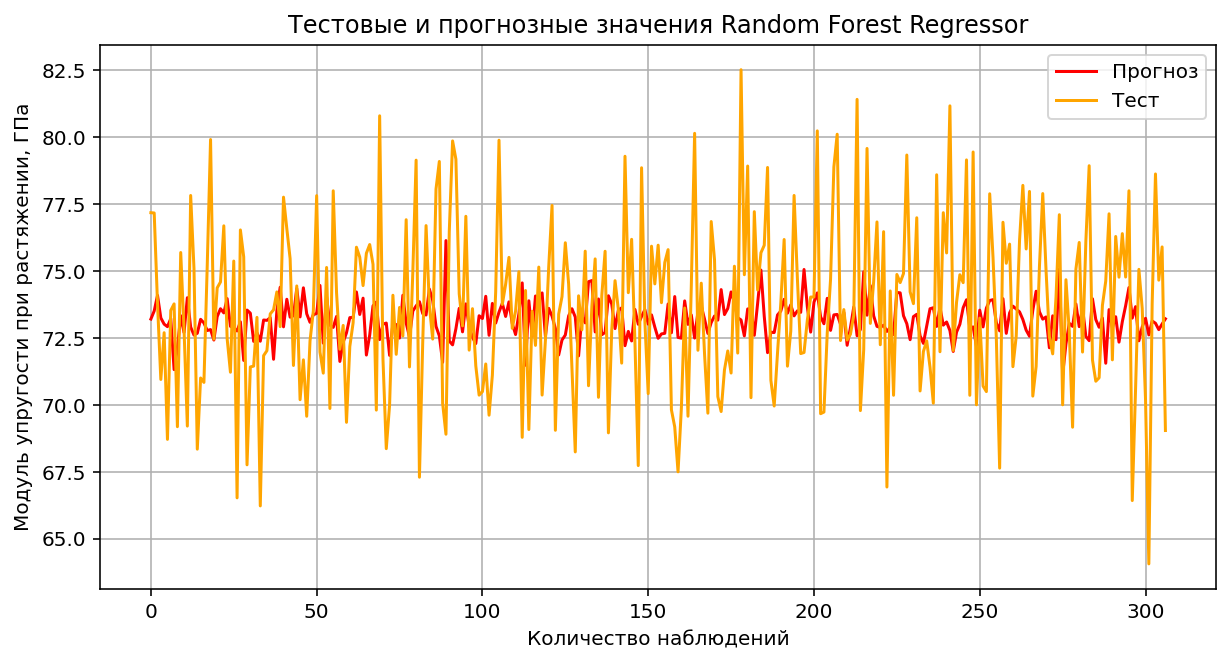

In [122]:
plt.figure(figsize=(10,5))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y2_pred_forest, label = "Прогноз", color = "red")
plt.plot(y_test_2.values, label = "Тест", color = 'orange')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [123]:
#построение модели и вузуализация Линейной регрессии
lr2 = LinearRegression()
lr2.fit(x_train_2, y_train_2)
y_pred_lr2 = lr2.predict(x_test_2)
mae_lr2 = mean_absolute_error(y_pred_lr2, y_test_2)
mse_lin_elast2 = mean_squared_error(y_test_2, y_pred_lr2)
print('Linear Regression Results Train:') # Скор для тренировочной выборки
print("Test score: {:.2f}".format(lr2.score(x_train_2, y_train_2)))
print('Linear Regression Results:')    
print('lr_MAE: ', round(mean_absolute_error(y_test_2, y_pred_lr2)))
print('lr_MSE: {:.2f}'.format(mse_lin_elast2))
print("lr_RMSE: {:.2f}".format (np.sqrt(mse_lin_elast2)))
print("Test score: {:.2f}".format(lr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки

Linear Regression Results Train:
Test score: 0.02
Linear Regression Results:
lr_MAE:  3
lr_MSE: 10.15
lr_RMSE: 3.19
Test score: -0.02


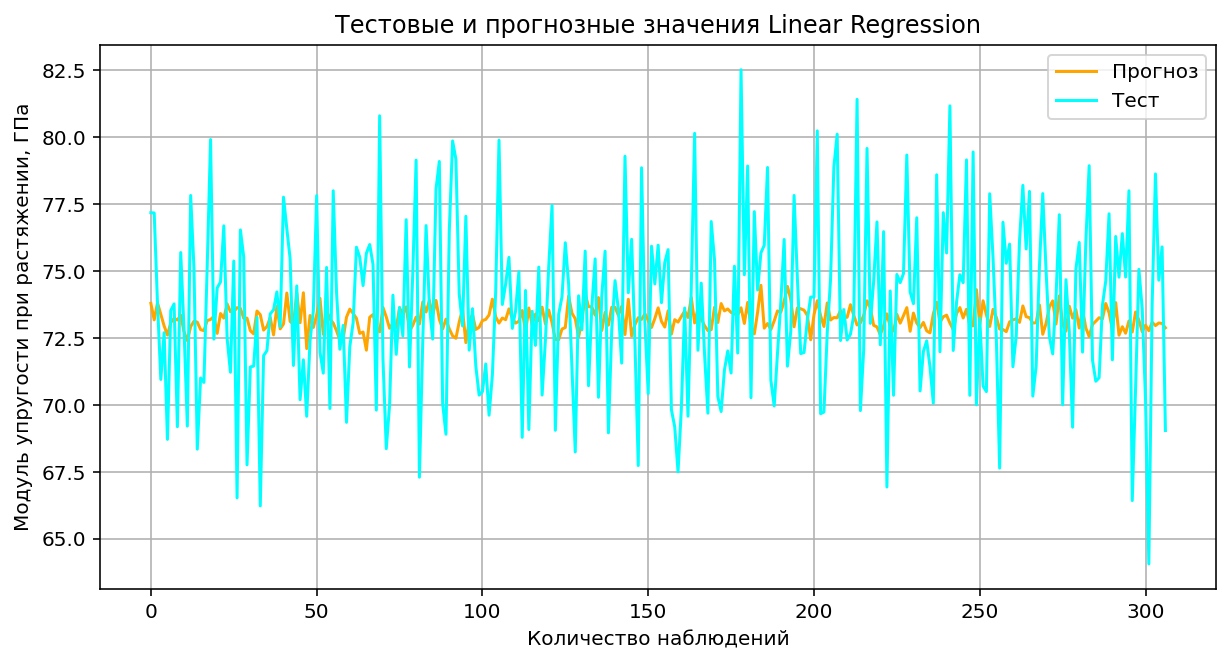

In [124]:
plt.figure(figsize = (10, 5))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'cyan')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

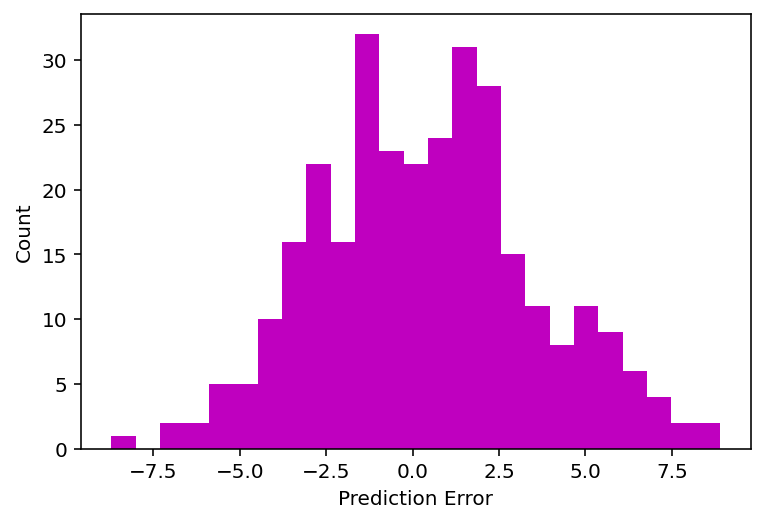

In [164]:
error = y_test_2 - y_pred_lr2
plt.hist(error, bins = 25, color = "m")
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [ ]:
#Выводим гиперпараметры для оптимальной модели
print(gs21.best_estimator_)
gs121 = gs21.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {gs121.score(x_test_2, y_test_2).round(3)}')

In [ ]:
new_row_in_mae_df = {'Регрессор': 'KNeighbors1_GridSearchCV', 'MAE': mae_knn21_grid} 

mae_df = mae_df.append(new_row_in_mae_df, ignore_index=True)
mae_df

In [128]:
#подставим оптимальные гиперпараметры в нашу модель метода деревья решений
dtr21_grid = DecisionTreeRegressor(criterion='poisson', max_depth=7, max_features='auto',
                      min_samples_leaf=100, min_samples_split=250)
#Обучаем модель
dtr21_grid.fit(x_train_2, y_train_2)

predictions_dtr21_grid = dtr21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_dtr21_grid = mean_absolute_error(predictions_dtr21_grid, y_test_2)
mae_dtr21_grid

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


2.5669543273874638

In [129]:
#Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

# Сформируем входы и выход для модели

tv = df3_merged['Соотношение матрица-наполнитель']
tr_v = df3_merged.loc[:, df3_merged.columns != 'Соотношение матрица-наполнитель']

# Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(tr_v, tv, test_size = 0.3, random_state = 14)

In [130]:
# Нормализуем данные

x_train_n = tf.keras.layers.Normalization(axis =-1)
x_train_n.adapt(np.array(x_train))

In [131]:
def create_model(lyrs=[32], act='softmax', opt='SGD', dr=0.1):
    
    seed = 7
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=x_train.shape[1], activation=act)) 
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    model.add(Dropout(dr))
    model.add(Dense(3, activation='tanh'))  # выходной слой
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['mae', 'accuracy'])
 
    return model

In [135]:
# строим модель
model = KerasClassifier(build_fn=create_model, verbose=0)

# определяем параметры
batch_size = [2, 10]
epochs = [10, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# поиск оптимальных параметров
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=10,
                    verbose=1, n_jobs=-1)

grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


<ipython-input-135-a0713a2585f4>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [136]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.001389 using {'batch_size': 2, 'epochs': 10}
0.001389 (0.004167) with: {'batch_size': 2, 'epochs': 10}
0.000000 (0.000000) with: {'batch_size': 2, 'epochs': 50}
0.001389 (0.004167) with: {'batch_size': 10, 'epochs': 10}
0.001389 (0.004167) with: {'batch_size': 10, 'epochs': 50}


In [141]:
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=4, verbose=0)

optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(opt=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

<ipython-input-141-94d307754a6c>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=4, verbose=0)


Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END ............................................opt=SGD; total time=  11.3s
[CV] END ............................................opt=SGD; total time=   7.6s
[CV] END ............................................opt=SGD; total time=  11.2s
[CV] END ............................................opt=SGD; total time=  11.3s
[CV] END ............................................opt=SGD; total time=   8.3s
[CV] END ............................................opt=SGD; total time=  11.4s
[CV] END ............................................opt=SGD; total time=   9.4s
[CV] END ............................................opt=SGD; total time=   9.1s
[CV] END ............................................opt=SGD; total time=  11.6s
[CV] END ............................................opt=SGD; total time=  11.7s
[CV] END ........................................opt=RMSprop; total time=   9.2s
[CV] END .......................................

In [142]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.002778 using {'opt': 'SGD'}
0.002778 (0.005556) with: {'opt': 'SGD'}
0.001389 (0.004167) with: {'opt': 'RMSprop'}
0.001389 (0.004167) with: {'opt': 'Adagrad'}


In [143]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

layers = [[8],[16, 4],[32, 8, 3],[12, 6, 3], [64, 64, 3], [92, 64, 16, 3]]
param_grid = dict(lyrs=layers)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

<ipython-input-143-78c6fcb61c93>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)


Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ...........................................lyrs=[8]; total time=  13.4s
[CV] END ...........................................lyrs=[8]; total time=  13.3s
[CV] END ...........................................lyrs=[8]; total time=  13.3s
[CV] END ...........................................lyrs=[8]; total time=  21.5s
[CV] END ...........................................lyrs=[8]; total time=  12.7s
[CV] END ...........................................lyrs=[8]; total time=  21.7s
[CV] END ...........................................lyrs=[8]; total time=  21.6s
[CV] END ...........................................lyrs=[8]; total time=  14.0s
[CV] END ...........................................lyrs=[8]; total time=  21.6s
[CV] END ...........................................lyrs=[8]; total time=  13.9s
[CV] END .......................................lyrs=[16, 4]; total time=  15.6s
[CV] END .......................................

In [144]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.001389 using {'lyrs': [8]}
0.001389 (0.004167) with: {'lyrs': [8]}
0.001389 (0.004167) with: {'lyrs': [16, 4]}
0.001389 (0.004167) with: {'lyrs': [32, 8, 3]}
0.001389 (0.004167) with: {'lyrs': [12, 6, 3]}
0.001389 (0.004167) with: {'lyrs': [64, 64, 3]}
0.000000 (0.000000) with: {'lyrs': [92, 64, 16, 3]}


In [145]:
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=2, verbose=0)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(act=activation)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(x_train, y_train)

<ipython-input-145-3890410f123d>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=2, verbose=0)


In [146]:
# построение окончательной модели
model = create_model(lyrs=[92, 64, 16, 3], dr=0.05)

print(model.summary())

Model: "sequential_171"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_460 (Dense)           (None, 92)                1288      
                                                                 
 dense_461 (Dense)           (None, 64)                5952      
                                                                 
 dense_462 (Dense)           (None, 16)                1040      
                                                                 
 dense_463 (Dense)           (None, 3)                 51        
                                                                 
 dropout_175 (Dropout)       (None, 3)                 0         
                                                                 
 dense_464 (Dense)           (None, 3)                 12        
                                                                 
Total params: 8,343
Trainable params: 8,343
Non-trai

In [149]:
# обучаем нейросеть, 100/20 CV
model_hist = model.fit(x_train, 
    y_train, 
    epochs = 100, 
    verbose = 1, 
    validation_split = 0.2)

Epoch 1/100
18/18 [==============================] - 0s 16ms/step - loss: -4.4336 - mae: 2.3135 - accuracy: 0.0000e+00 - val_loss: -4.8924 - val_mae: 2.3690 - val_accuracy: 0.0000e+00
Epoch 2/100
18/18 [==============================] - 0s 10ms/step - loss: -4.4007 - mae: 2.3133 - accuracy: 0.0000e+00 - val_loss: -4.8924 - val_mae: 2.3690 - val_accuracy: 0.0000e+00
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: -4.4516 - mae: 2.3135 - accuracy: 0.0000e+00 - val_loss: -4.8924 - val_mae: 2.3690 - val_accuracy: 0.0000e+00
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: -4.4028 - mae: 2.3135 - accuracy: 0.0000e+00 - val_loss: -4.8924 - val_mae: 2.3690 - val_accuracy: 0.0000e+00
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: -4.4389 - mae: 2.3133 - accuracy: 0.0000e+00 - val_loss: -4.8924 - val_mae: 2.3690 - val_accuracy: 0.0000e+00
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: -4.3491 - 

In [150]:
# оценим модель
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10/10 [==============================] - 0s 2ms/step - loss: -4.2582 - mae: 2.2393 - accuracy: 0.0000e+00

mae: 223.93%


In [151]:
model_hist.history

{'loss': [-4.433554649353027,
  -4.400708198547363,
  -4.451626300811768,
  -4.40284538269043,
  -4.438854694366455,
  -4.349133014678955,
  -4.407451629638672,
  -4.45418643951416,
  -4.365494728088379,
  -4.396535396575928,
  -4.445403099060059,
  -4.460806846618652,
  -4.45393705368042,
  -4.375335216522217,
  -4.339449405670166,
  -4.469494819641113,
  -4.429119110107422,
  -4.379532814025879,
  -4.466761112213135,
  -4.417178153991699,
  -4.459145545959473,
  -4.413519859313965,
  -4.436489105224609,
  -4.3600664138793945,
  -4.472414493560791,
  -4.448305130004883,
  -4.445682048797607,
  -4.441378116607666,
  -4.437577724456787,
  -4.451725006103516,
  -4.478082180023193,
  -4.4578070640563965,
  -4.479194164276123,
  -4.436169624328613,
  -4.452752590179443,
  -4.454145908355713,
  -4.412046432495117,
  -4.484644889831543,
  -4.492374420166016,
  -4.474739074707031,
  -4.477550506591797,
  -4.3939361572265625,
  -4.496152877807617,
  -4.413966655731201,
  -4.512571811676025,
  

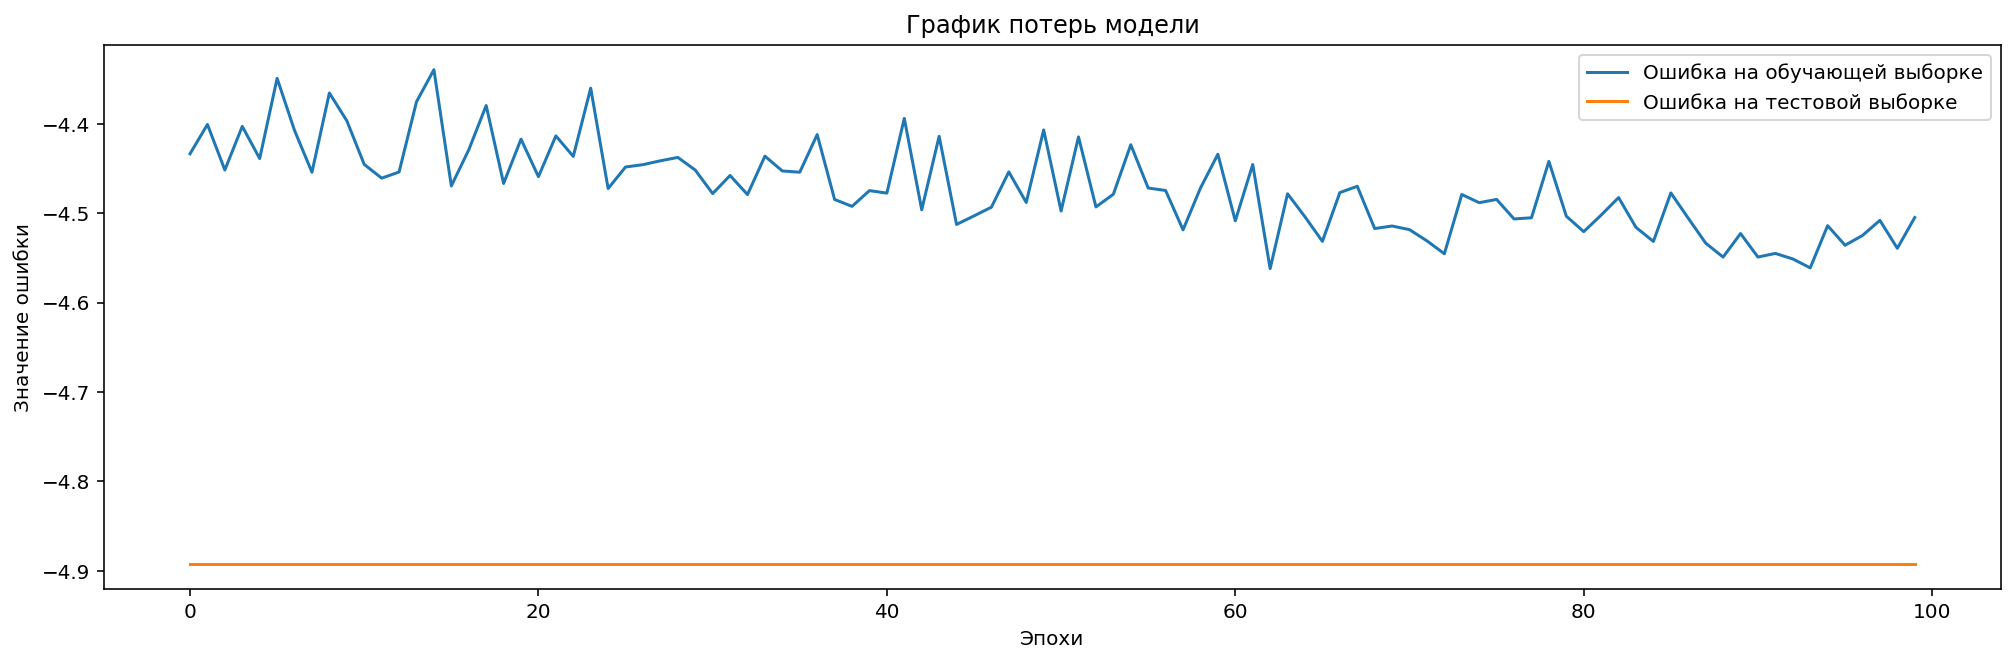

In [152]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist):
    plt.figure(figsize = (17,5))
    plt.plot(model_hist.history['loss'],
             label = 'ошибка на обучающей выборке')
    plt.plot(model_hist.history['val_loss'],
            label = 'ошибка на тестовой выборке')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
    plt.show()
model_loss_plot(model_hist)

10/10 [==============================] - 0s 2ms/step


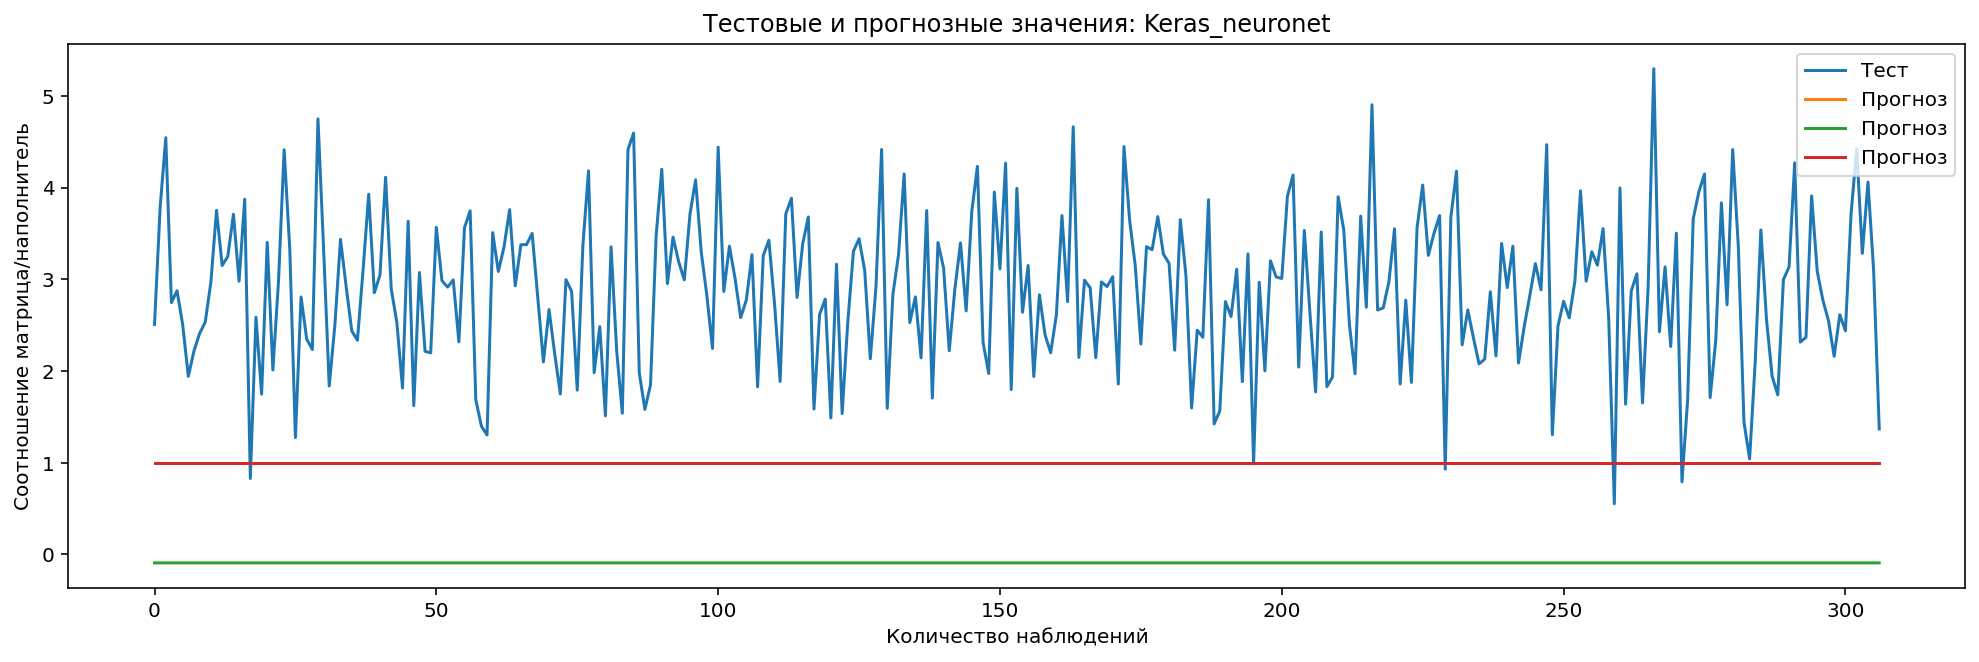

In [153]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')

Заключение

Стоит подвести итог и сказать, что машинное обучение в задачах моделей прогнозирования – довольно сложный процесс, требующий навыков программирования, и профессионального подхода к сфере самих композитных материалов.
 Необходимо понимать, на какие атрибуты нужно в первую очередь обратить внимание, чтобы суметь впоследствии грамотно и чётко спрогнозировать тот или иной признак. И, естественно, обладать всеми необходимыми знаниями, умениями и навыками для прогнозов и расчетов. 
 В ходе работы был задействован дата-сет с реальными данными, произведен сопутствующий анализ; построены разнообразные графики,осуществлено разбиение данных на обучающую и тестовую выборки, которая во многом облегчила процесс машинного обучения. 
 В рамках машинного обучения и поиска гиперпараметров были задействованы несколько алгоритмов: линейная регрессия, К ближайших соседей, деревья решений,случайный лес.
  Поиск гиперпараметров осуществлялся при помощи таких методов, как «GridSearch».Обучена нейронная сеть и разработано пользовательское приложение, предсказывающе вероятный прогноз по заданным параметрам. 
